##  Mobile Price Predictor

###1. Introduction

Objective:

Predict the price of a mobile phone based on its technical specifications.

Data Source:
Mobile phone data scraped from Flipkart, including features like brand, RAM, storage, battery capacity, camera quality, and screen size.

Key Skills Demonstrated:

Web scraping and real-world data collection

Data cleaning and preprocessing

Exploratory Data Analysis (EDA)

Feature engineering

Building and comparing regression & tree based models

Model evaluation using metrics like MAE and R²

Interpreting feature importance for business insights

Business Importance:
Helps businesses optimize pricing strategies, plan inventory, and offer personalized recommendations to customers.










###2. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

###3. Loading and Viewing the Data

Summary :
1. Storage column has ROM information however entries are very less, Since ROM information is available in RAM column as well, Storage column is removed from dataset

2. Mobile_name column has hidden data of color and ROM in GB, Separate color column is created from it. ROM information is available in RAM column with more details.

3. RAM column has both RAM and ROM information hence it is separated into 2 columns RAM and ROM

In [ ]:
df = pd.read_csv('/content/sample_data/flipkart_mobiles.csv')

In [ ]:
df_copy = df.copy()

In [ ]:
df.head()

,Mobile_Name,RAM,Storage,Display_Size,Primary_Camera,Battery_Capacity,Processor,Warranty,Original_Price,Discount_Percentage,Price_INR
0,"Nothing Phone (3a) (White, 128 GB)",8 GB RAM | 128 GB ROM,NaN,17.2 cm (6.77 inch) Full HD+ Display,50MP (Main) + 50MP (2X Tele Photo) + 8MP (Ultr...,5000 mAh Battery,7s Gen3 Processor,1 Year Manufacturing Warranty,27999.0,11%,24999.0
1,"vivo T4x 5G (Pronto Purple, 128 GB)",8 GB RAM | 128 GB ROM,NaN,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,Dimensity 7300 5G Processor,1 Year Warranty for Device and 6 Months Warran...,19499.0,23%,14999.0
2,"REDMI A3X (Olive Green, 64 GB)",3 GB RAM | 64 GB ROM | Expandable Upto 1 TB,NaN,17.04 cm (6.71 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,NaN,1 Year Manufacturer Warranty for Phone and 6 M...,9999.0,40%,5999.0
3,"vivo T4x 5G (Marine Blue, 128 GB)",6 GB RAM | 128 GB ROM,NaN,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,Dimensity 7300 5G Processor,1 Year Warranty for Device and 6 Months Warran...,17999.0,22%,13999.0
4,"MOTOROLA Edge 60 Stylus (PANTONE Surf the Web,...",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB,NaN,16.94 cm (6.67 inch) Display,50MP + 13MP | 32MP Front Camera,5000 mAh Battery,7s Gen 2 Mobile Processor Processor,1 Year Warranty on Handset and 6 Months Warran...,28999.0,21%,22999.0


In [ ]:
df.sample(10)

,Mobile_Name,RAM,Storage,Display_Size,Primary_Camera,Battery_Capacity,Processor,Warranty,Original_Price,Discount_Percentage,Price_INR
197,"realme 70 TURBO 5G (Yellow, 128 GB)",8 GB RAM | 128 GB ROM,NaN,16.94 cm (6.67 inch) Full HD+ Display,50MP Rear Camera,5000 mAh Battery,Segment's Fastest Dimensity 7300 Energy 5G Chi...,NaN,20999.0,26%,15439.0
988,"Tecno Spark Go 1 (Glittery White, 64 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,NaN,17.12 cm (6.74 inch) HD+ Display,50MP + AI Lens + 2MP | 8MP Front Camera,5000 mAh Battery,Helio G85 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,1799.0,34%,1184.0
615,"SAMSUNG Galaxy M16 5G (Blush Pink, 128 GB)",32 MB RAM | 32 MB ROM | Expandable Upto 16 GB,NaN,6.1 cm (2.4 inch) QVGA Display,0.3MP Rear Camera | 0.3MP Front Camera,3600 mAh Battery,NaN,NaN,15499.0,11%,13865.0
468,"Tecno Pova 6 Neo 5G (Midnight Shadow, 256 GB)",8 GB RAM | 256 GB ROM | Expandable Upto 1 TB,NaN,16.94 cm (6.67 inch) Display,108MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Dimensity 6300 5G Processor,1 Year Manufacturer Warranty for Phone,16999.0,18%,13999.0
384,"Apple iPhone 16e (Black, 128 GB)",8 GB RAM | 256 GB ROM,NaN,17.22 cm (6.78 inch) Display,50MP Rear Camera,6400 mAh Battery,NaN,1 Year Manufacturer Warranty for Phone and 6 M...,59900.0,3%,57999.0
919,"Google Pixel 8 Pro (Obsidian, 256 GB)",16 GB RAM | 512 GB ROM,NaN,17.32 cm (6.82 inch) Display,64MP Rear Camera,5400 mAh Battery,NaN,1 Year Brand Warranty,12999.0,19%,10500.0
202,"REDMI 13 5G (Orchid Pink, 128 GB)",6 GB RAM | 128 GB ROM,NaN,17.25 cm (6.79 inch) Full HD+ Display,108MP Rear Camera,5030 mAh Battery,Qualcomm SM4450 Snapdragon 4 Gen 2 AE (4 nm) P...,NaN,17999.0,31%,12499.0
295,"IQOO Z9S 5G (Titanium Matte, 256 GB)",8 GB RAM | 256 GB ROM,NaN,17.2 cm (6.77 inch) Full HD+ AMOLED Display,50MP + 50MP | 2MP Dual Front Camera,5500 mAh Battery,MediaTek Dimensity 7300 5G Processor,12 Months Brand Warranty on Smartphone,27999.0,25%,20987.0
49,"vivo T3 Lite 5G (Vibrant Green, 128 GB)",4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,NaN,16.66 cm (6.56 inch) Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Dimensity 6300 Processor,1 Year Manufacturer Warranty for Device and 6 ...,14499.0,28%,10499.0
1005,"REDMI 13 5G (Orchid Pink, 128 GB)",6 GB RAM | 128 GB ROM,NaN,17.12 cm (6.74 inch) Display,50MP Rear Camera,5000 mAh Battery,NaN,NaN,22999.0,24%,17499.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mobile_Name          1004 non-null   object 
 1   RAM                  941 non-null    object 
 2   Storage              57 non-null     object 
 3   Display_Size         1000 non-null   object 
 4   Primary_Camera       979 non-null    object 
 5   Battery_Capacity     946 non-null    object 
 6   Processor            804 non-null    object 
 7   Warranty             746 non-null    object 
 8   Original_Price       984 non-null    float64
 9   Discount_Percentage  1001 non-null   object 
 10  Price_INR            1002 non-null   float64
dtypes: float64(2), object(9)
memory usage: 87.2+ KB


###4. Data Extraction, Cleaning and Categorization

Starting with column "Mobile_Name"

In [ ]:
df['Mobile_Name']

,Mobile_Name
0,"Nothing Phone (3a) (White, 128 GB)"
1,"vivo T4x 5G (Pronto Purple, 128 GB)"
2,"REDMI A3X (Olive Green, 64 GB)"
3,"vivo T4x 5G (Marine Blue, 128 GB)"
4,"MOTOROLA Edge 60 Stylus (PANTONE Surf the Web,..."
...,...
1008,Jmax DELUXE 6
1009,"REDMI 13c 5G (Startrail Green, 128 GB)"
1010,"REDMI 13c 5G (Starlight Black, 128 GB)"
1011,itel MagicX Play 4G| 1900 mAh battery| Expanda...


if the mobile name / brand is missing then it is problematic. there are 9 missing entries. it is difficult to guess the these mobile names from other columns. hence these 9 missing entries will be dropped

In [ ]:
df['Mobile_Name'].isna().sum()

np.int64(9)

In [ ]:
df = df.dropna(subset=['Mobile_Name'])
#df['Mobile_Name'].head(50)

First word is extracted from "Mobile_name" column to create new column called "Brand"

In [ ]:
df['Brand'] = df['Mobile_Name'].str.extract(r'^(\w+)')

Next, if we extract mobile models, it will be very high number of categories for the data of approx. 1000 rows. hence a new column is created called "Mobile_Categories" based on the models. it consists of 12 categories as shown below

In [ ]:
import re

# Updated Mapping patterns to new improved categories
category_mapping = {
    # Ultra_Premium
    r"Apple iPhone (?:1[46] Pro|15 Pro)": "Ultra_Premium",
    r"Samsung Galaxy (?:Z|S25 Ultra)": "Ultra_Premium",
    r"Google Pixel 9 Pro": "Ultra_Premium",
    r"Motorola Edge 50 Ultra": "Ultra_Premium",
    r"vivo X200 Pro": "Ultra_Premium",

    # Premium_Classic
    r"Apple iPhone (?:1[3456])\b(?! Pro)": "Premium_Classic",
    r"Samsung Galaxy S(?:24|25)\b(?! Ultra)": "Premium_Classic",
    r"Google Pixel (?:7|8|9)\b(?! Pro)": "Premium_Classic",
    r"OnePlus (?:11|12|13)": "Premium_Classic",
    r"vivo X200\b(?! Pro)": "Premium_Classic",
    r"Xiaomi 14 CIVI": "Premium_Classic",

    # Midrange_Pro
    r"Samsung Galaxy A(?:5|3)\d*": "Midrange_Pro",
    r"vivo (?:V\d+|T3 Pro|T3 Ultra)": "Midrange_Pro",
    r"realme (?:13 Pro|14 Pro)": "Midrange_Pro",
    r"Redmi Note (?:13 Pro|14 Pro)": "Midrange_Pro",
    r"Motorola (?:Edge|G85)": "Midrange_Pro",
    r"OnePlus Nord.*(?:CE4|3|4)": "Midrange_Pro",
    r"IQOO Z9[sS]?": "Midrange_Pro",
    r"OPPO (?:Reno|F27)": "Midrange_Pro",

    # Midrange_Core
    r"Samsung Galaxy A(?:1|2)\d*": "Midrange_Core",
    r"vivo T3[xX]? Lite?": "Midrange_Core",
    r"realme (?:12|Narzo.*5G)": "Midrange_Core",
    r"Redmi Note (?:13|14)\b(?! Pro)": "Midrange_Core",
    r"OnePlus Nord.*Lite": "Midrange_Core",

    # Gaming_Edition
    r"Infinix GT": "Gaming_Edition",
    r"realme (?:70 TURBO|P1 Speed)": "Gaming_Edition",
    r"POCO (?:F|X)": "Gaming_Edition",
    r"IQOO (?:Neo|12)": "Gaming_Edition",

    # Smart_Value_Plus
    r"Samsung Galaxy (?:M|F)\d*": "Smart_Value_Plus",
    r"Motorola g(?:45|64|35|05|04)": "Smart_Value_Plus",

    # Performance_5G_Plus
    r"(realme C(?:63|65) 5G|POCO C(?:75|65) 5G).*(120 ?Hz)": "Performance_5G_Plus",

    # Core_5G
    r"Lava Blaze.*5G": "Core_5G",
    r"Tecno Spark 30C 5G": "Core_5G",
    r"Infinix (?:Note|Hot).*5G": "Core_5G",
    r"REDMI (?:13|14C) 5G.*128 GB": "Core_5G",
    r"vivo T3[xX]? Lite?.*5G.*128 GB": "Core_5G",

    # Essential_5G
    r"REDMI (?:13|14C) 5G.*64 GB": "Essential_5G",
    r"vivo T3[xX]? Lite?.*5G.*64 GB": "Essential_5G",
    r"POCO C(?:75|65) 5G.*64 GB": "Essential_5G",
    r"realme C(?:63|65) 5G.*64 GB": "Essential_5G",

    # Essential_4G
    r"REDMI A(?:3X|3|5)\b(?! 5G)": "Essential_4G",
    r"POCO C(?:61|71)\b(?! 5G)": "Essential_4G",
    r"realme C61\b(?!.*5G)": "Essential_4G",

    # Entry_Storage
    r"REDMI A.*(?:32 GB|64 GB)": "Entry_Storage",
    r"Infinix SMART": "Entry_Storage",
    r"Tecno Spark.*(?:32 GB|64 GB)": "Entry_Storage",
    r"POCO C(?:61|71).*32 GB": "Entry_Storage",
    r"realme C61.*32 GB": "Entry_Storage",

    # Entry_Basic
    r"itel (?:A50|Aura)": "Entry_Basic",
    r"Lava Yuva": "Entry_Basic",
    r"vivo Y(?:18|02)": "Entry_Basic",

    # Feature_Phone
    r"(Nokia|itel|Kechaoda|Lava|Karbonn|Jio).*(Keypad|Dual Sim)": "Feature_Phone",
}

# Categorization function with fallback
def categorize_mobile(name):
    name = name.lower()

    for pattern, category in category_mapping.items():
        if re.search(pattern, name, re.IGNORECASE):
            return category

    # Smart fallback based on keywords
    if "32 gb" in name:
        return "Entry_Storage"
    if "64 gb" in name:
        return "Essential_5G" if "5g" in name else "Essential_4G"
    if "5g" in name:
        if "128 gb" in name:
            return "Performance_5G_Plus" if "120 hz" in name else "Core_5G"
        return "Essential_5G"
    return "Essential_4G"  # basic fallback


<Axes: title={'center': 'Distribution of Mobile Categories'}, xlabel='Model'>

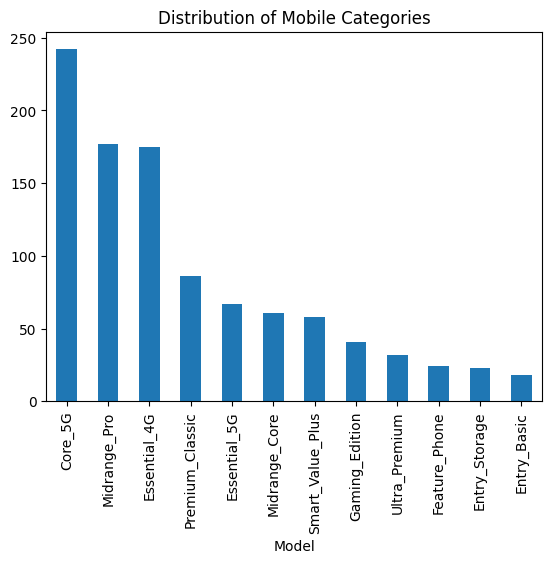

In [ ]:
df['Model'] = df['Mobile_Name'].apply(categorize_mobile)
df['Model'].value_counts().plot(kind='bar',title='Distribution of Mobile Categories')

In [ ]:
len(df['Model'].unique())

12

In [ ]:
df['color'] = df['Mobile_Name'].str.extract(r'\(([^,]+),')                        # extracting full color names(e.g. Pronto Purple) from column Mobile_Name
df['color']=df['color'].str.split().str[-1]                                       # Picking primary color name
df['color']=df['color'].str.replace(r'\(*','',regex=True)                         # Cleaning if anywhere '(' appears
df['color'].unique()

array(['White', 'Purple', 'Green', 'Blue', 'Web', 'Red', nan, 'Black',
       'Sea', 'Gold', 'Diamond', 'Bliss', 'Pink', 'SILVER', 'Lavender',
       'ORANGE', 'Grey', 'Brown', 'Dust', 'Magenta', 'Starlight',
       'Orange', 'Silver', 'Cloud', 'Violet', 'Lilac', 'Matte',
       'Stardust', 'BLUE', 'Titanium', 'Gray', 'Marble', 'Night',
       'Ultramarine', 'Bay', 'Slipstream', 'Noir', 'Chrome', 'Yellow',
       'Fuzz', 'Obsidian', 'Glow', 'Zephyr', 'Graphite', 'Mint',
       'Amazonite', 'Lemongrass', 'Flow', 'Midnight', 'Legend', 'Frost',
       'Poinciana', 'Dawn', 'Eclipse', 'Ocean', 'Blss', 'Shadow',
       'Whitesilver', 'Aloe', 'Alpha', 'Teal', 'Sky', 'GOLD', 'Snow',
       'Bronze', 'Navy', 'Porcelain', 'Hazel', 'Twilight', 'Wood',
       'Olive', 'LAVENDER', 'Icyblue', 'GREEN', 'Cream', 'Peony',
       'Charcoal', 'Gladiator', 'Beige', 'Iceblue', 'Marigold', 'Fantasy',
       'Silverblue', 'Dune', 'Quartz', 'Emerald', 'Dark', 'Delight'],
      dtype=object)

Color categories are reduced to basic color names as below

In [ ]:
# Color mapping dictionary
color_map = {
    'Blue': ['Blue', 'BLUE', 'Iceblue', 'Silverblue', 'Icyblue', 'Ultramarine', 'Navy', 'Sky', 'Slipstream', 'Bay'],
    'Green': ['Green', 'GREEN', 'Teal', 'Mint', 'Olive', 'Amazonite', 'Aloe', 'Emerald'],
    'Red': ['Red', 'Marigold', 'Poinciana', 'Peony', 'Gladiator', 'Fantasy', 'Pink'],
    'Purple': ['Purple', 'Violet', 'Lilac', 'Lavender', 'LAVENDER', 'Magenta', 'Zephyr', 'Bliss', 'Blss'],
    'Black/Gray': ['Black', 'Grey', 'Gray', 'Charcoal', 'Obsidian', 'Shadow', 'Noir', 'Graphite', 'Dark'],
    'White/Silver': ['White', 'Whitesilver', 'SILVER', 'Silver', 'Snow', 'Chrome', 'Frost', 'Dawn', 'Porcelain'],
    'Yellow/Gold': ['Yellow', 'Gold', 'GOLD', 'Bronze', 'Dune', 'Quartz'],
    'Brown/Neutral': ['Brown', 'Beige', 'Wood', 'Dust'],
    'Orange': ['ORANGE', 'Orange'],
    'Multicolor/Abstract': ['Web', 'Diamond', 'Legend', 'Alpha', 'Delight', 'Flow', 'Fuzz', 'Glow'],
    'Dark/Gradient': ['Midnight', 'Twilight', 'Eclipse', 'Night'],
    'Metallic/Fantasy': ['Titanium', 'Starlight', 'Stardust', 'Marble'],
    'Other': ['Cloud', 'Ocean', 'Matte']
}

# Create a lowercase reverse map
reverse_map = {}
for category, items in color_map.items():
    for item in items:
        reverse_map[item.lower()] = category

# Map the original column to the reduced color category
df['color'] = df['color'].str.lower().map(reverse_map).fillna('Other')


In [ ]:
df['color'].unique()

array(['White/Silver', 'Purple', 'Green', 'Blue', 'Multicolor/Abstract',
       'Red', 'Other', 'Black/Gray', 'Yellow/Gold', 'Orange',
       'Brown/Neutral', 'Metallic/Fantasy', 'Dark/Gradient'], dtype=object)

<Axes: xlabel='color'>

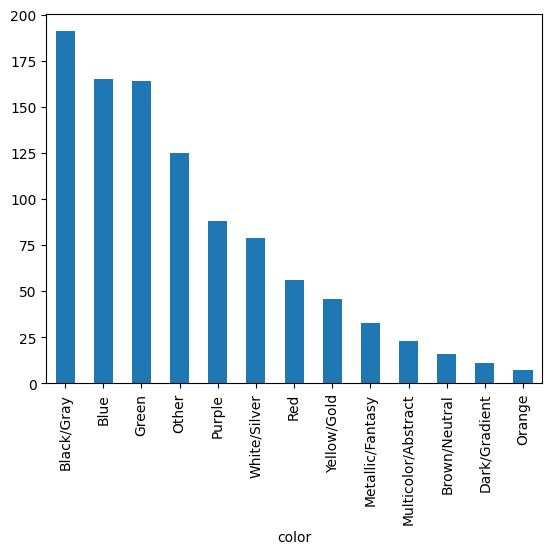

In [ ]:
df['color'].value_counts().plot(kind='bar')

Extracting RAM details in a column called "Mobile_RAM"

In [ ]:
df['Mobile_RAM'] = df['RAM'].str.split('|').str[0]
df['Mobile_RAM'] = df['Mobile_RAM'].str.replace(r'RAM','').str.strip()
df['Mobile_RAM'].unique()

array(['8 GB', '3 GB', '6 GB', '4 GB', '32 MB', '12 GB', nan, '16 GB',
       '4 MB', '36 MB', '20 MB', '40 MB', '500 MB', '8 MB', '2 GB',
       '24 MB', '64 MB', '0.046875 GB', '45 MB', '48 MB'], dtype=object)

Extracting ROM details in a column called "ROM"

In [ ]:
df['ROM'] = df['RAM'].str.split('|').str[1].str.replace(' ROM','').str.strip()
df['ROM']=df['ROM'].fillna(df['Storage'].str.replace('ROM','').str.strip())
df['ROM'].unique()

array(['128 GB', '64 GB', '256 GB', '32 MB', '512 GB', '32 GB', '4 MB',
       '16 GB', '3 MB', '64 MB', '24 MB', nan, '36 MB', '35 MB', '4 GB',
       '20 MB', '128 MB', '0.125 GB', '1024 GB', '32 KB'], dtype=object)

Extracting display inch details in a column called "Display_Inch"

In [ ]:
df['Display_Inch'] = df['Display_Size'].str.extract(r'\((\d+\.*\d*)')
df['Display_Inch'].unique()

array(['6.77', '6.72', '6.71', '6.67', '6.88', '1.77', '6.74', '6.7',
       '6.79', '6.78', '6.5', '6.745', '6.56', '6.1', '1.8', '6.6', '2.4',
       '2', '0.66', '2.8', '6.83', '6.3', '6.9', '6.55', '6.4', '1.44',
       '6.2', nan, '6.8', '6.657', '6.7165354', '6.82', '6.68', '6.75',
       '6.58', '6.667', '6.51', '2.6', '6.53', '6.52', '1.3', '6.64',
       '6.59'], dtype=object)

Extracting battery capacity in column called "Battery_Capacity"

In [ ]:
#df['Battery_Capacity'] = df['Battery_Capacity'].str.split().str[0]
df['Battery_Capacity'] = df['Battery_Capacity'].str.extract(r'(\d+)\s*mAh')

In [ ]:
df['Battery_Capacity'].unique()

array(['5000', '6500', '5200', '7000', '5500', '1000', '5030', '5160',
       '6000', '5100', '5110', nan, '1200', '800', '1900', '4500', '6550',
       '4404', '4700', '1750', '4310', '850', '4000', '3600', '6400',
       '5600', '3900', '4270', '1800', '5060', '5800', '2574', '1450',
       '6200', '1700', '4300', '2000', '4600', '400', '2575', '5400',
       '5050'], dtype=object)

Categorizing mobile processor names into Broader Categories

In [ ]:
processor_mapping = {
    # Snapdragon_Flagship
    r"(Qualcomm\s*)?Snapdragon\s*8\s*(Gen\s*(1|2|3|4)|Elite|s\s*Gen\s*3)": "Snapdragon_Flagship",
    r"(Qualcomm\s*)?SD\s*8\s*(Gen\s*(1|2|3|4)|Elite|s\s*Gen\s*3)": "Snapdragon_Flagship",

    # Snapdragon_Advanced
    r"(Qualcomm\s*)?Snapdragon\s*7\+?\s*(Gen\s*(1|2|3)|s\s*Gen\s*(2|3)|Accelerated\s*Edition)": "Snapdragon_Advanced",
    r"(Qualcomm\s*)?SD\s*7\+?\s*(Gen\s*(1|2|3)|s\s*Gen\s*(2|3))": "Snapdragon_Advanced",
    r"(Qualcomm\s*)?Snapdragon\s*6\s*(Gen\s*(1|3|4)|s\s*Gen\s*3)": "Snapdragon_Advanced",
    r"(Qualcomm\s*)?SD\s*6\s*(Gen\s*(1|3|4)|s\s*Gen\s*3)": "Snapdragon_Advanced",

    # Snapdragon_Basic
    r"(Qualcomm\s*)?Snapdragon\s*(4\s*(Gen\s*(1|2)|s\s*Gen\s*2)(\s*(AE|5G))?|680|695|732G|860)": "Snapdragon_Basic",
    r"(Qualcomm\s*)?SD\s*(4\s*(Gen\s*(1|2)|s\s*Gen\s*2)(\s*AE)?|680|695|732G|860)": "Snapdragon_Basic",

    # MediaTek_Dimensity_Flagship
    r"(MediaTek\s*)?Dimensity\s*(9100|9200|9300|9400|8200|8350)(\s*(Ultimate|Ultra|5G))?:": "MediaTek_Dimensity_Flagship",

    # MediaTek_Dimensity_Advanced
    r"(MediaTek\s*)?Dimensity\s*(7020|7025|7050|7200|7300|7350|7400)(\s*(Pro|Ultra|Energy|5G|Ultimate))?:": "MediaTek_Dimensity_Advanced",
    r"Octacore\s*26GHz\s*MediaTek\s*Dimensity\s*7050": "MediaTek_Dimensity_Advanced",

    # MediaTek_Dimensity_Basic
    r"(MediaTek\s*)?Dimensity\s*(6000|6010|6020|6080|6100|6300|6400)(\s*(Plus|5G|Mobile\s*Platform))?:": "MediaTek_Dimensity_Basic",

    # MediaTek_Helio
    r"(MediaTek\s*)?Helio\s*(G(25|36|37|50|81|85|88|96|99)|P35)(\s*(4G))?:": "MediaTek_Helio",
    r"Helios\s*G85": "MediaTek_Helio",  # Handle typo "Helios"
    r"G(37|85)": "MediaTek_Helio",  # Handle shorthand like "G37 Processor"

    # Apple_Bionic
    r"(Apple\s*)?A(15|16|17|18|19)(\s*(Pro|Chip|Bionic))?": "Apple_Bionic",

    # Exynos_Flagship
    r"(Samsung\s*)?Exynos\s*(2200|2300|2400|2400e)": "Exynos_Flagship",

    # Exynos_Basic
    r"(Samsung\s*)?Exynos\s*(1280|1330|1380|1480|1580)(\s*Octa\s*Core)?:": "Exynos_Basic",
    r"Samsng\s*Exynos\s*1580": "Exynos_Basic",  # Handle typo "Samsng"

    # Unisoc
    r"Unisoc\s*(T|SC)[0-9]+": "Unisoc",
    r"Unisoc\s*Processor": "Unisoc",

    # Google_Tensor
    r"Google\s*Tensor\s*G[2-4]": "Google_Tensor",
    r"Tensor\s*G[2-4]": "Google_Tensor",
    r"G4\s*Tensor\s*Chip": "Google_Tensor",

    # Feature_Phone_Processor
    r"SC6531E": "Feature_Phone_Processor",
    r"MediaTek\s*MT6261D": "Feature_Phone_Processor",
    r"Processor\s*(clock|speed)\s*400\s*MH[zZ]": "Feature_Phone_Processor",

    # Unknown_Processor (for invalid entries)
    r"OxygenOS\s*140": "Other_Processor",
    r"NA\s*Processor": "Other_Processor",
    r"NO\s*Processor": "Other_Processor",
    r"Not\s*Availble\s*Processor": "Other_Processor",
}

# Function to categorize a processor, preserving NaN values
def categorize_processor(processor_name):
    # Preserve NaN values
    if pd.isna(processor_name):
        return pd.NA

    # Convert to string and clean (only for non-NaN values)
    processor_name = str(processor_name).strip()

    # Apply the regex mapping
    for pattern, category in processor_mapping.items():
        if re.search(pattern, processor_name, re.IGNORECASE):
            return category

    # Improved default categorization
    processor_name_lower = processor_name.lower()
    if "snapdragon" in processor_name_lower or "sd" in processor_name_lower:
        if "8" in processor_name_lower:
            return "Snapdragon_Flagship"
        if "7" in processor_name_lower or "6" in processor_name_lower:
            return "Snapdragon_Advanced"
        return "Snapdragon_Basic"
    if "dimensity" in processor_name_lower:
        if any(num in processor_name_lower for num in ["9100", "9200", "9300", "9400", "8200", "8350"]):
            return "MediaTek_Dimensity_Flagship"
        if any(num in processor_name_lower for num in ["7020", "7025", "7050", "7200", "7300", "7350", "7400"]):
            return "MediaTek_Dimensity_Advanced"
        return "MediaTek_Dimensity_Basic"
    if "helio" in processor_name_lower or "g37" in processor_name_lower or "g85" in processor_name_lower:
        return "MediaTek_Helio"
    if "apple" in processor_name_lower or "bionic" in processor_name_lower or "a1[5-9]" in processor_name_lower:
        return "Apple_Bionic"
    if "exynos" in processor_name_lower:
        if any(num in processor_name_lower for num in ["2200", "2300", "2400"]):
            return "Exynos_Flagship"
        return "Exynos_Basic"
    if "unisoc" in processor_name_lower or "t[0-9]+" in processor_name_lower:
        return "Unisoc"
    if "tensor" in processor_name_lower or "g[2-4]" in processor_name_lower:
        return "Google_Tensor"
    if "octa\s*core\s*22\s*ghz" in processor_name_lower:  # Generic MediaTek
        return "MediaTek_Dimensity_Advanced"
    return "Other_Processor"  # Default for unhandled processors (non-NaN)

# Apply categorization and store in Mobile_Processor column
df['Processor'] = df['Processor'].apply(categorize_processor)


Extracting Primary rear Camera details in column called "Primary_rear_Camera"

In [ ]:
df['Primary_rear_Camera'] = df['Primary_Camera'].str.extract(r'^(\d*\.?\d+)').astype(float)
df['Primary_rear_Camera'].unique()

array([5.00e+01, 8.00e+00, 3.20e+01, 0.00e+00, 1.08e+02, 1.30e+01,
       1.20e+01, 4.80e+01,      nan, 3.00e-01, 8.00e-01, 6.40e+01,
       2.00e+02, 1.30e+00, 2.00e+00, 5.00e+00, 8.00e-02, 2.00e-01])

Extracting Secondary rear Camera details in column called "Secondary_rear_Camera"

In [ ]:
df['Secondary_rear_Camera'] = df['Primary_Camera'].str.split('|').str[0].str.findall(r'(\d*\.?\d+)MP').str[1].str.replace('MP','').astype(float)
df['Secondary_rear_Camera'].unique()

array([50.  ,  2.  ,   nan, 13.  ,  8.  , 12.  ,  5.  ,  0.  , 48.  ,
       10.  ,  0.08,  0.5 ,  0.3 ])

In case more rear cameras are available, it is captured in column "Number of rear Camera "

In [ ]:
df['Number_of_rear_Cameras'] = (
    df['Primary_Camera']
    .str.findall(r'(\d*\.?\d+)MP')  # Find all int/float followed by 'MP'
    .apply(lambda x: len([num for num in x if float(num) != 0]) if isinstance(x, list) and x else 0)  # Count non-zero values, handle empty lists
)
df['Number_of_rear_Cameras'].unique()

array([4, 3, 2, 0, 1, 5, 6])

A separate column for availability of AI lens is created

In [ ]:
df['AI_lens'] = df['Primary_Camera'].str.contains('ai lens',case=False, regex=True).astype(float)

In [ ]:
df['Front_Camera'] = df['Primary_Camera'].str.split('|').str[1].str.findall('\d+MP').str[0].str.replace('MP','')
df['Front_Camera'].unique()

array(['32', '8', '5', '16', '0', '13', nan, '20', '12', '2', '50', '3',
       '10', '42'], dtype=object)

A separate column for availability of Front Dual Camera is created

In [ ]:
df['Front_Dual_Camera'] = df['Primary_Camera'].str.split('|').str[1].str.findall('\d+MP').str.len()>1
df['Front_Dual_Camera'] = df['Front_Dual_Camera'].astype(int)

New Column is created called Warrenty_Available : if year or month is available in Warrenty column then 1 else 0

In [ ]:
df['Warranty_Available'] = df['Warranty'].str.contains(r'year|month',case= False, regex = True).astype(float)

percentage discounts are captured in below column

In [ ]:
df['Discount_Percentage'] = df['Discount_Percentage'].str.replace('%',"")
df['Discount_Percentage']

,Discount_Percentage
0,11
1,23
2,40
3,22
4,21
...,...
1008,29
1009,NaN
1010,NaN
1011,NaN


Newly created columns are kept and redundant columns are removed from dataframe

In [ ]:
df.drop(columns = ['Mobile_Name','RAM','Storage','Display_Size','Primary_Camera','Warranty'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1004 entries, 0 to 1012
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Battery_Capacity        933 non-null    object 
 1   Processor               802 non-null    object 
 2   Original_Price          982 non-null    float64
 3   Discount_Percentage     999 non-null    object 
 4   Price_INR               1000 non-null   float64
 5   Brand                   1004 non-null   object 
 6   Model                   1004 non-null   object 
 7   color                   1004 non-null   object 
 8   Mobile_RAM              937 non-null    object 
 9   ROM                     993 non-null    object 
 10  Display_Inch            995 non-null    object 
 11  Primary_rear_Camera     971 non-null    float64
 12  Secondary_rear_Camera   598 non-null    float64
 13  Number_of_rear_Cameras  1004 non-null   int64  
 14  AI_lens                 974 non-null    float

### Treating missing values

,0
Battery_Capacity,7.609861
Processor,25.187032
Original_Price,2.240326
Discount_Percentage,0.500501
Price_INR,0.400000
Brand,0.000000
Model,0.000000
color,0.000000
Mobile_RAM,7.150480
ROM,1.107754


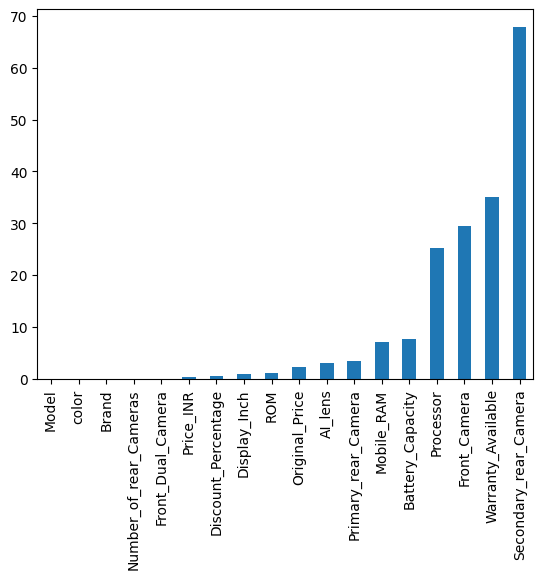

In [ ]:
percent_missing = df.isna().sum()/df.count()*100
percent_missing.sort_values().plot(kind='bar')
percent_missing

If a particular row has > 6 number of missing values (or columns corresponding to missing values) then that row is dropped

In [ ]:
df= df.drop(df[df.isnull().sum(axis=1) > 6].index)

<Axes: >

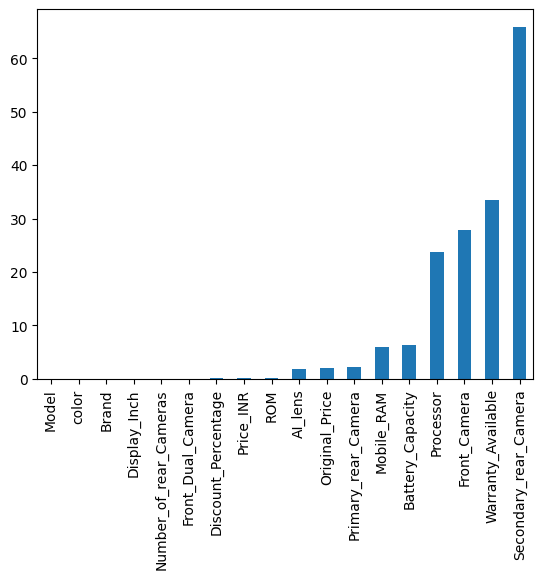

In [ ]:
percent_missing = df.isna().sum()/df.count()*100
percent_missing.sort_values().plot(kind='bar')

Treatment on Color column :
- there are 105 NaN entries for color. we can make one assumption that black color is most common color observed for mobile of any type. so these NaN entries are replaced with Black color

In [ ]:
df['color'] = df['color'].fillna('Black')

In [ ]:
#df_v1.groupby(['Brand','Model','Mobile_RAM','ROM','Battery_Capacity'])['Original_Price'].mean().head(50)
df[df['Price_INR'].isnull()][['Brand','Model','Original_Price']]

,Brand,Model,Original_Price
813,SAMSUNG,Midrange_Pro,NaN
859,realme,Core_5G,NaN


As both "Original_Price" and "Price_INR" are missing, these rows will be deleted.

In [ ]:
df= df.dropna(subset = "Price_INR")

For column 'Original_Price', 18 rows have missing values. These are the same rows where discount was not mentioned. After looking at website from where data was scrapped, it is observed that these corresponds to no discounts/ 0% discount.  Hence these missing values are filled with values from 'Price_INR' column. also corresponding Discount_Percentage is filled with 0 value.

In [ ]:
df['Original_Price'] = df['Original_Price'].fillna(df['Price_INR'])                           #Price_INR == Original price at 0% discount
df['Discount_Percentage'] = df['Discount_Percentage'].str.replace('#DIV/0!','0')
df['Discount_Percentage'] = df['Discount_Percentage'].fillna(0)                               #Replace discount percentage NaN with 0
df['Discount_Percentage'] = df['Discount_Percentage'].astype(float)                           #Convert column from Object to Float64

<Axes: >

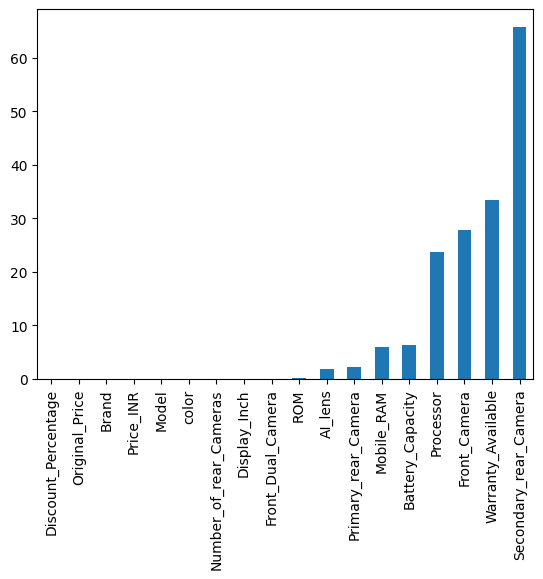

In [ ]:
percent_missing = df.isna().sum()/df.count()*100
percent_missing.sort_values().plot(kind='bar')

Secondary_rear_Camera : Entries are missing as secondary rear camera is not available. missing values are replaced with 0

In [ ]:
df['Secondary_rear_Camera'] = df['Secondary_rear_Camera'].fillna('0')                  # replace NaN with 0
df['Secondary_rear_Camera'] = df['Secondary_rear_Camera'].astype(int)                  # convert from object to int


Warranty_Available column : Missing values correspond to columns where warranty is 0. these entries are replaced with 0 warranty  

In [ ]:
df['Warranty_Available'] = df['Warranty_Available'].fillna(0)

Front_Camera : Entries are missing as Front Camera is not available. missing values are replaced with 0 values

In [ ]:
df['Front_Camera'] = df['Front_Camera'].fillna('0')                                # missing values replaced with 0
df['Front_Camera'] = df['Front_Camera'].astype(int)                                # converted from Object to int type

Mobile_Processor : around 200 entries are missing. here it can be assumed that identical 'brand' and 'Model' columns have same processors. Hence missing values are replaced with Mobile_Processor values of same 'brand'.

In [ ]:
df['Processor'] = df['Processor'].fillna(df.groupby(['Brand', 'Model'])['Processor'].transform('first'))     #replacing with Processors of identical brand and model

<Axes: xlabel='Processor'>

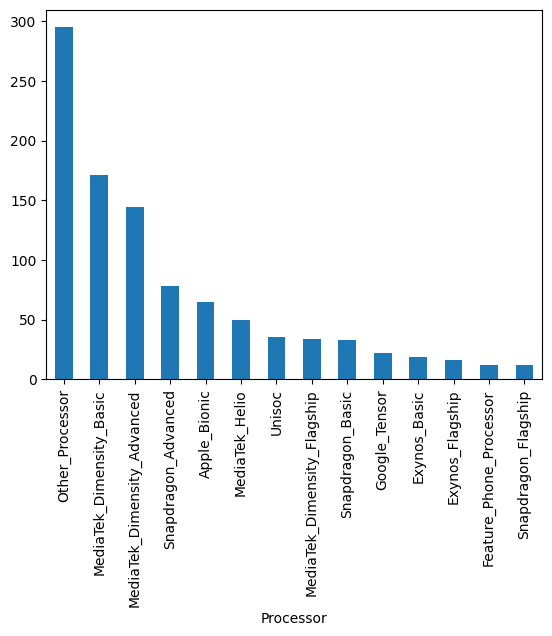

In [ ]:
df['Processor'].value_counts().plot(kind='bar')

In [ ]:
missing_count = df['Processor'].isna().sum()
print(f"Number of missing Mobile_Processor entries after Brand-Model imputation: {missing_count}")

Number of missing Mobile_Processor entries after Brand-Model imputation: 4


In [ ]:
df['Processor'] = df['Processor'].fillna(df.groupby(['Brand'])['Processor'].transform('first'))

Number of missing Mobile_Processor entries after imputation: 0


<Axes: title={'center': 'Distribution of Mobile Processor Categories (After Imputation)'}, xlabel='Processor', ylabel='Count'>

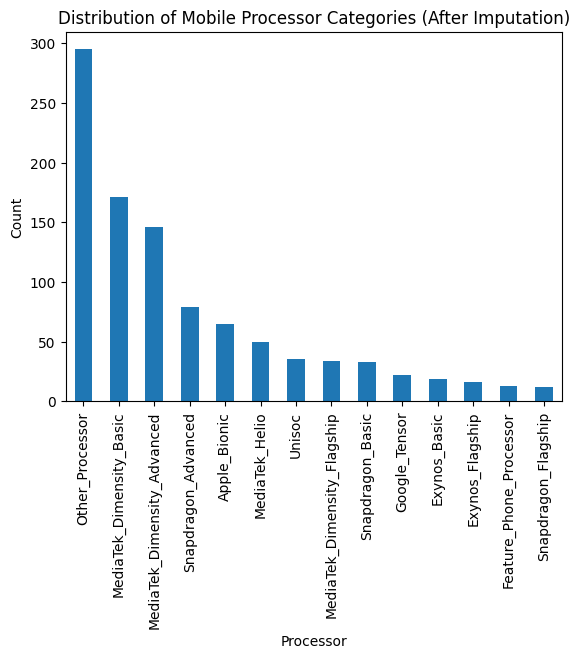

In [ ]:
# Function infer_processor to infer missing processors based on Brand
def infer_processor(row):
    if pd.isna(row['Processor']):
        brand = str(row['Brand']).lower()

        # Feature phones
        if brand in ['lava', 'kechaoda', 'itel', 'karbonn', 'jio','nokia','snexian','hmd']:
            return 'Feature_Phone_Processor'

        # Apple phones
        if brand == 'apple':
            return 'Apple_Bionic'

        # Google phones
        if brand == 'google':
            return 'Google_Tensor'

        # Samsung phones
        if brand == 'samsung':
            return 'Exynos_Basic'  # Default to midrange Exynos

        # vivo and OPPO phones
        if brand in ['vivo','oppo','xiaomi']:
            return 'MediaTek_Dimensity_Basic'  # Default to midrange Dimensity

        # Budget/midrange phones
        if brand in ['redmi', 'poco']:
            return 'Snapdragon_Basic'  # REDMI/POCO often use Snapdragon
        if brand in ['realme', 'iqoo', 'tecno', 'oneplus','infinix']:
            return 'MediaTek_Dimensity_Basic'  # Default to midrange Dimensity

    return row['Processor']

# Apply the inference
df['Processor'] = df.apply(infer_processor, axis=1)

# Verify no missing values remain
print("Number of missing Mobile_Processor entries after imputation:", df['Processor'].isna().sum())

# Plot the distribution
df['Processor'].value_counts().plot(kind='bar', xlabel='Processor', ylabel='Count', title='Distribution of Mobile Processor Categories (After Imputation)')

Mobile_RAM : Identical rows (Brand, Model, ROM ) having RAM values are filled in place of missing entries.
remaining missing entries are filled with '0 RAM' category

In [ ]:
df['Mobile_RAM'] = df['Mobile_RAM'].fillna(df.groupby(['Brand', 'Model','ROM'])['Mobile_RAM'].transform('first'))
df['Mobile_RAM'] = df['Mobile_RAM'].fillna('0 GB')
df['Mobile_RAM'].unique()

array(['8 GB', '3 GB', '6 GB', '4 GB', '32 MB', '12 GB', '16 GB', '4 MB',
       '0 GB', '36 MB', '20 MB', '40 MB', '500 MB', '8 MB', '2 GB',
       '24 MB', '64 MB', '0.046875 GB', '45 MB', '48 MB'], dtype=object)

All Mobile RAM values are transformed into Numerical GB entries

In [ ]:
def convert2GB(x):
  x = str(x).replace(' ','')
  if 'GB' in x:
    x=float(x.replace('GB',''))
  elif 'MB' in x:
    x=float(x.replace('MB',''))*0.001
  elif 'KB' in x:
    x=float(x.replace('KB',''))*0.000001
  else:
    x=float(x)
  return x

df['ROM'] = df['ROM'].apply(lambda x:convert2GB(x))                                     # Convert to Numerical with unit GB

df['Mobile_RAM'] = df['Mobile_RAM'].apply(lambda x:convert2GB(x))                       # Convert to Numerical with unit GB

Battery Capacity missing values are filled with identical Brand, Model and ROM entries

In [ ]:
df['Battery_Capacity'] = df['Battery_Capacity'].fillna(df.groupby(['Brand', 'Model','ROM'])['Battery_Capacity'].transform('first'))
df['Battery_Capacity'] = df['Battery_Capacity'].fillna(df.groupby(['Brand', 'ROM'])['Battery_Capacity'].transform('first'))
df['Battery_Capacity'].unique()

array(['5000', '6500', '5200', '7000', '5500', '1000', '5030', '5160',
       '6000', '5100', '5110', '1200', '800', '1900', '4500', '6550',
       '4404', '4700', '1750', '4310', '850', '4000', '3600', None,
       '6400', '5600', '3900', '4270', '6200', '1800', '5060', '5800',
       '2574', '1450', '1700', '4300', '2000', '4600', '400', '2575',
       '5400', '5050'], dtype=object)

<Axes: >

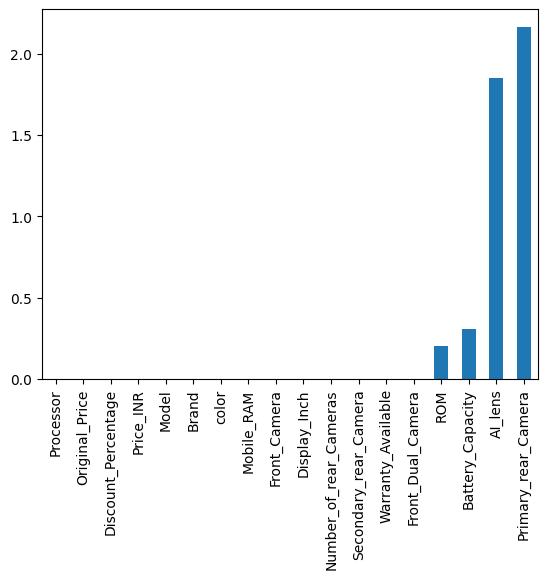

In [ ]:
percent_missing = df.isna().sum()/df.count()*100
percent_missing.sort_values().plot(kind='bar')

The remaining missing rows have missing information about Camera ( rear / front) and percentage missing is < 5.  These rows should be dropped from dataset

In [ ]:
df= df.dropna()

<Axes: >

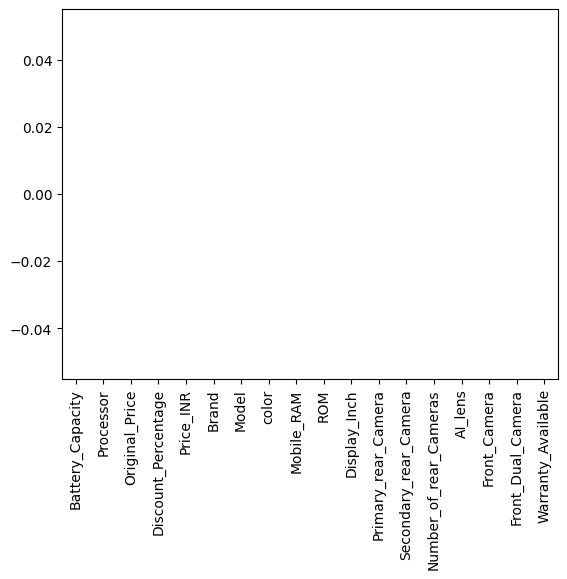

In [ ]:
percent_missing = df.isna().sum()/df.count()*100
percent_missing.sort_values().plot(kind='bar')

conversion to numerical entries for columns "Display_Inch", "Primary_rear_Camera" and "Battery_Capacity"

In [ ]:
df['Display_Inch'] = df['Display_Inch'].astype(float)
df['Primary_rear_Camera'] = df['Primary_rear_Camera'].astype(float)
df['Battery_Capacity'] = df['Battery_Capacity'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 1008
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Battery_Capacity        964 non-null    float64
 1   Processor               964 non-null    object 
 2   Original_Price          964 non-null    float64
 3   Discount_Percentage     964 non-null    float64
 4   Price_INR               964 non-null    float64
 5   Brand                   964 non-null    object 
 6   Model                   964 non-null    object 
 7   color                   964 non-null    object 
 8   Mobile_RAM              964 non-null    float64
 9   ROM                     964 non-null    float64
 10  Display_Inch            964 non-null    float64
 11  Primary_rear_Camera     964 non-null    float64
 12  Secondary_rear_Camera   964 non-null    int64  
 13  Number_of_rear_Cameras  964 non-null    int64  
 14  AI_lens                 964 non-null    float6

After treating missing entries, total number of entries in all columns are identical now

###6. EDA (exploratory data analysis)

Conclusions:

- Price column is right skewed
- Brand : Realme has highest count in dataset meaning higher volume/skews, apple has highest avg price. meaning costlier phones
- Color : black, green, blue are more common colors
- Display Inch : More than 6 inch phones are usually smartphones whereas < 3 inch phones are mostly feature phones
- Phones having more number of cameras are costlier
- Front Dual camera & AI lens : very few in numbers
- Mobile ROM :128MB is most common
- Warranty : almost 70% of brands are giving warranties
- Discount_Percentage : 20-30% discount is common for most brands, High price models have relatively less % of discounts

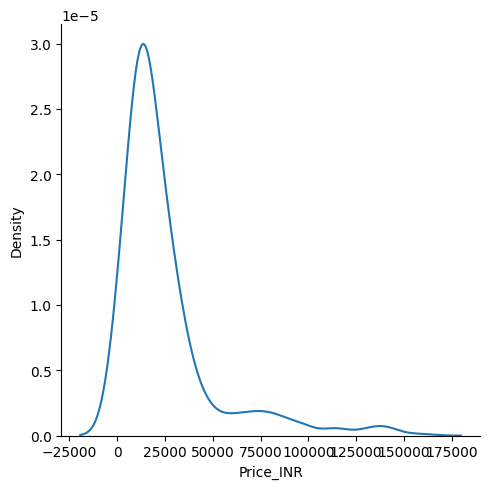

In [ ]:
sns.displot(df['Price_INR'],kind='kde')

In [ ]:
df.select_dtypes(include=['float64', 'int64']).corr()['Price_INR'].sort_values(ascending=False)

,Price_INR
Price_INR,1.000000
Original_Price,0.987821
Secondary_rear_Camera,0.187372
Number_of_rear_Cameras,0.140130
Mobile_RAM,0.090756
ROM,0.086865
Front_Camera,0.078767
Primary_rear_Camera,0.075676
Battery_Capacity,0.037104
Display_Inch,0.028589


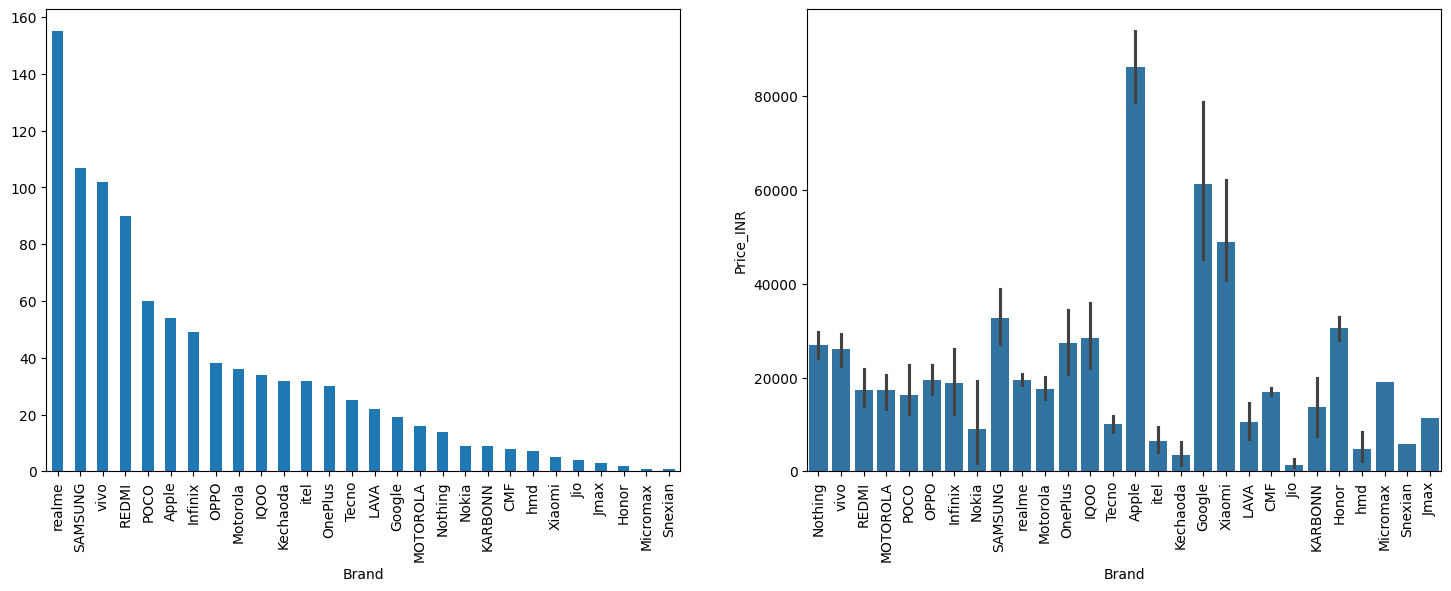

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Frequency of brands
df['Brand'].value_counts().plot(kind='bar', ax=ax1)
ax1.tick_params(axis='x', rotation=90)

# Plot 2: Average Price_INR per brand
sns.barplot(data=df, x="Brand", y="Price_INR", ax=ax2)
ax2.tick_params(axis='x', rotation=90)

plt.show()

Brands with counts < 5 are removed

In [ ]:
brand_counts = df['Brand'].value_counts()
valid_brands = brand_counts[brand_counts >= 5].index
df = df[df['Brand'].isin(valid_brands)]

In [ ]:
df[df['Model']=="Ultra_Premium"]

,Battery_Capacity,Processor,Original_Price,Discount_Percentage,Price_INR,Brand,Model,color,Mobile_RAM,ROM,Display_Inch,Primary_rear_Camera,Secondary_rear_Camera,Number_of_rear_Cameras,AI_lens,Front_Camera,Front_Dual_Camera,Warranty_Available
211,6000.0,Apple_Bionic,119900.0,6.0,112900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,128.000,6.30,48.0,48,4,0.0,12,0,0.0
222,5500.0,Apple_Bionic,144900.0,6.0,135900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,256.000,6.90,48.0,48,4,0.0,12,0,0.0
246,5000.0,Other_Processor,141999.0,0.0,141999.0,SAMSUNG,Ultra_Premium,Black/Gray,12.000,512.000,6.90,200.0,50,5,0.0,12,0,1.0
275,6000.0,Apple_Bionic,119900.0,6.0,112900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,128.000,6.30,48.0,48,4,0.0,12,0,0.0
276,6000.0,Apple_Bionic,119900.0,6.0,112900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,128.000,6.30,48.0,48,4,0.0,12,0,0.0
305,5500.0,Apple_Bionic,144900.0,6.0,135900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,256.000,6.90,48.0,48,4,0.0,12,0,0.0
312,5500.0,Apple_Bionic,144900.0,6.0,135900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,256.000,6.90,48.0,48,4,0.0,12,0,0.0
419,5500.0,MediaTek_Dimensity_Advanced,119900.0,6.0,112900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,256.000,6.67,50.0,8,4,0.0,20,0,1.0
449,6000.0,Other_Processor,129999.0,0.0,129999.0,SAMSUNG,Ultra_Premium,White/Silver,8.000,128.000,6.72,50.0,2,3,0.0,8,0,1.0
451,6000.0,Other_Processor,144900.0,5.0,137900.0,Apple,Ultra_Premium,Metallic/Fantasy,8.000,128.000,6.72,50.0,2,3,0.0,8,0,1.0


Below index rows are dropped because it belongs to Ultra_premium models however have very less prices of models

In [ ]:
df.drop([880,824,829],inplace=True)

<Axes: xlabel='color'>

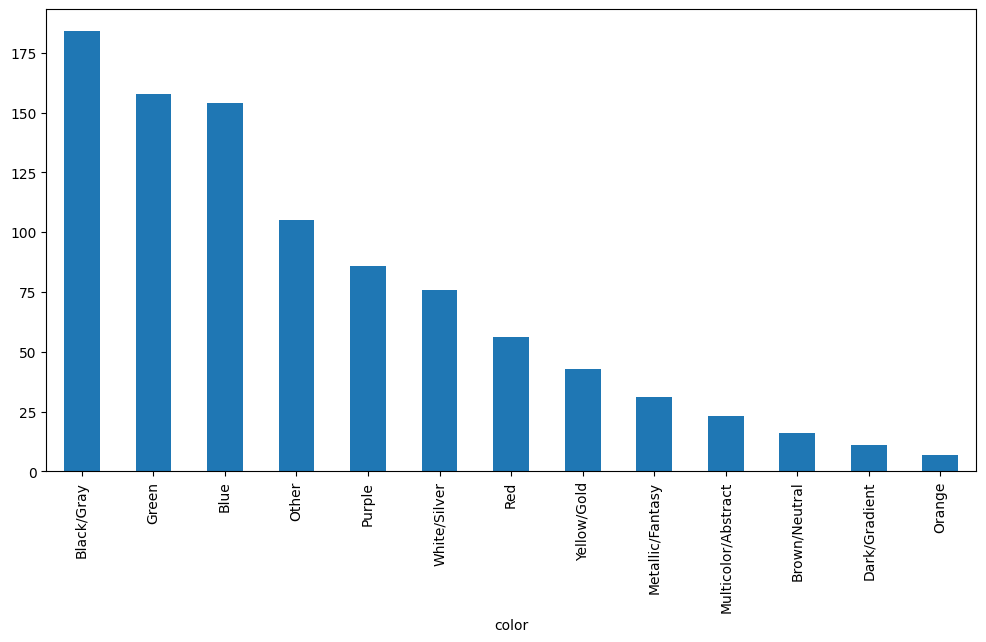

In [ ]:
plt.figure(figsize=(12, 6))
df['color'].value_counts().plot(kind='bar')

In [ ]:
df['color'].unique()

array(['White/Silver', 'Purple', 'Green', 'Blue', 'Multicolor/Abstract',
       'Red', 'Other', 'Black/Gray', 'Yellow/Gold', 'Orange',
       'Brown/Neutral', 'Metallic/Fantasy', 'Dark/Gradient'], dtype=object)

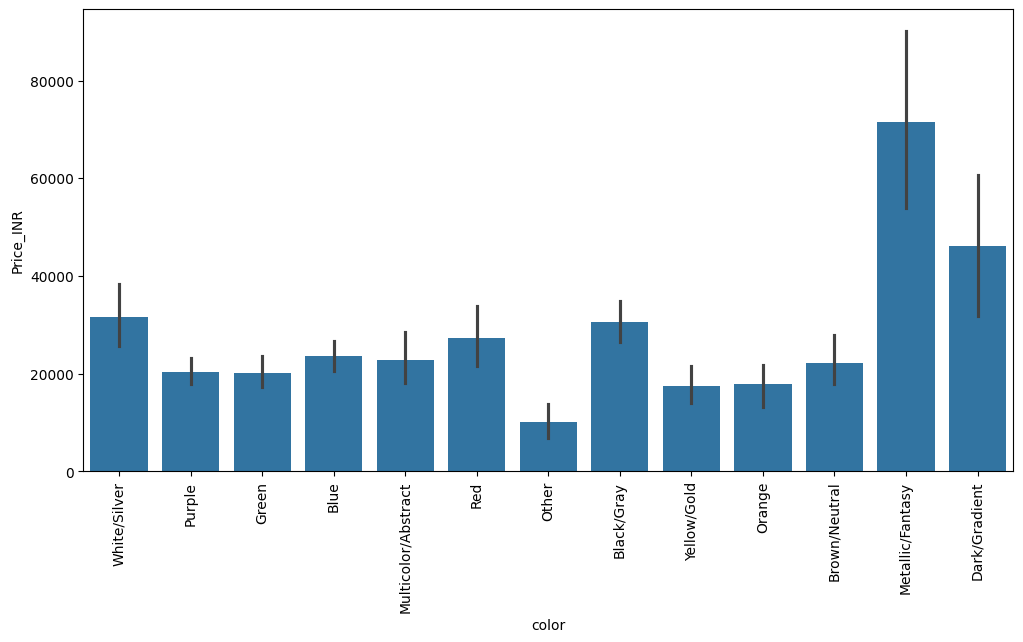

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x='color',y=df['Price_INR'].sort_values())
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df[df['color']=='Other'].head(10)

,Battery_Capacity,Processor,Original_Price,Discount_Percentage,Price_INR,Brand,Model,color,Mobile_RAM,ROM,Display_Inch,Primary_rear_Camera,Secondary_rear_Camera,Number_of_rear_Cameras,AI_lens,Front_Camera,Front_Dual_Camera,Warranty_Available
11,1000.0,Feature_Phone_Processor,1599.0,23.0,1225.0,Nokia,Feature_Phone,Other,0.032,0.032,1.77,0.0,0,0,0.0,0,0,0.0
14,1000.0,Feature_Phone_Processor,1599.0,25.0,1205.0,Nokia,Feature_Phone,Other,0.032,0.032,1.77,0.0,0,0,0.0,0,0,0.0
15,5000.0,Other_Processor,28999.0,21.0,22999.0,MOTOROLA,Midrange_Pro,Other,8.000,256.000,6.67,50.0,13,3,0.0,32,0,1.0
44,1000.0,Feature_Phone_Processor,1399.0,17.0,1158.0,Nokia,Feature_Phone,Other,0.032,0.032,1.77,0.0,0,0,0.0,0,0,0.0
74,5000.0,MediaTek_Dimensity_Basic,15999.0,25.0,11999.0,Tecno,Core_5G,Other,6.000,128.000,6.67,108.0,0,2,0.0,8,0,1.0
84,5500.0,MediaTek_Dimensity_Advanced,27999.0,25.0,20987.0,IQOO,Midrange_Pro,Other,8.000,256.000,6.77,50.0,50,3,0.0,2,0,1.0
87,5500.0,Snapdragon_Advanced,25999.0,22.0,20393.0,IQOO,Midrange_Pro,Other,8.000,128.000,6.77,50.0,0,1,0.0,0,0,0.0
103,1200.0,MediaTek_Dimensity_Advanced,1649.0,47.0,874.0,itel,Feature_Phone,Other,0.004,0.004,2.40,0.3,0,1,0.0,0,0,0.0
111,1200.0,Unisoc,1349.0,42.0,777.0,itel,Essential_4G,Other,0.004,0.004,2.00,0.3,0,1,0.0,0,0,0.0
112,800.0,Other_Processor,1499.0,40.0,898.0,Kechaoda,Essential_4G,Other,0.032,16.000,0.66,0.0,0,0,0.0,0,0,1.0


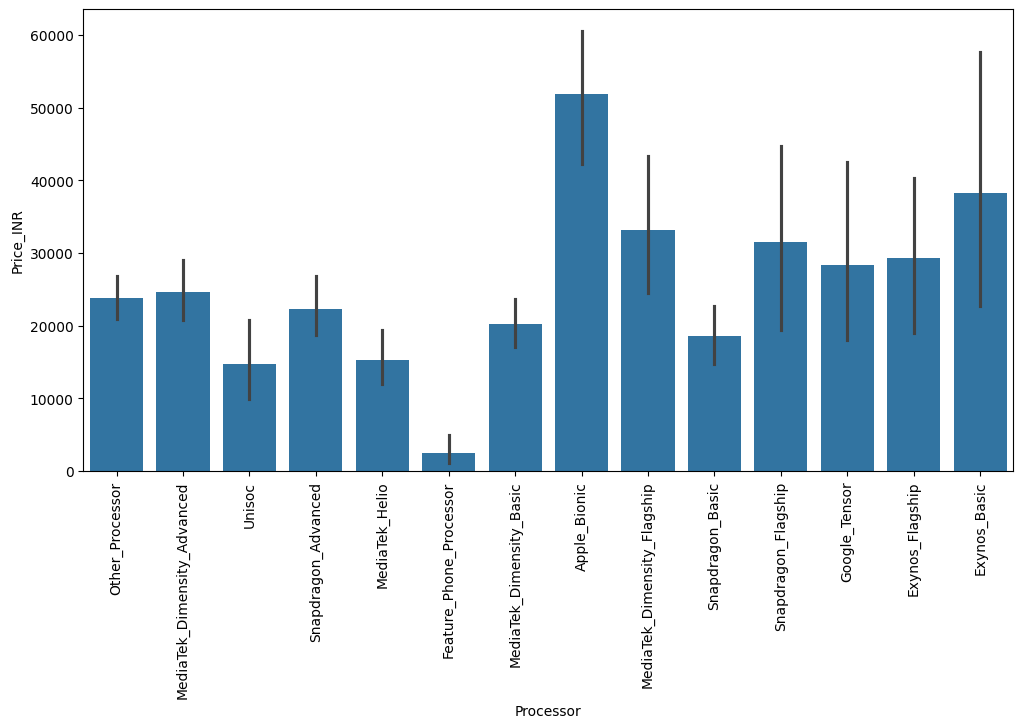

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df,x='Processor',y=df['Price_INR'])
plt.xticks(rotation='vertical')
plt.show()

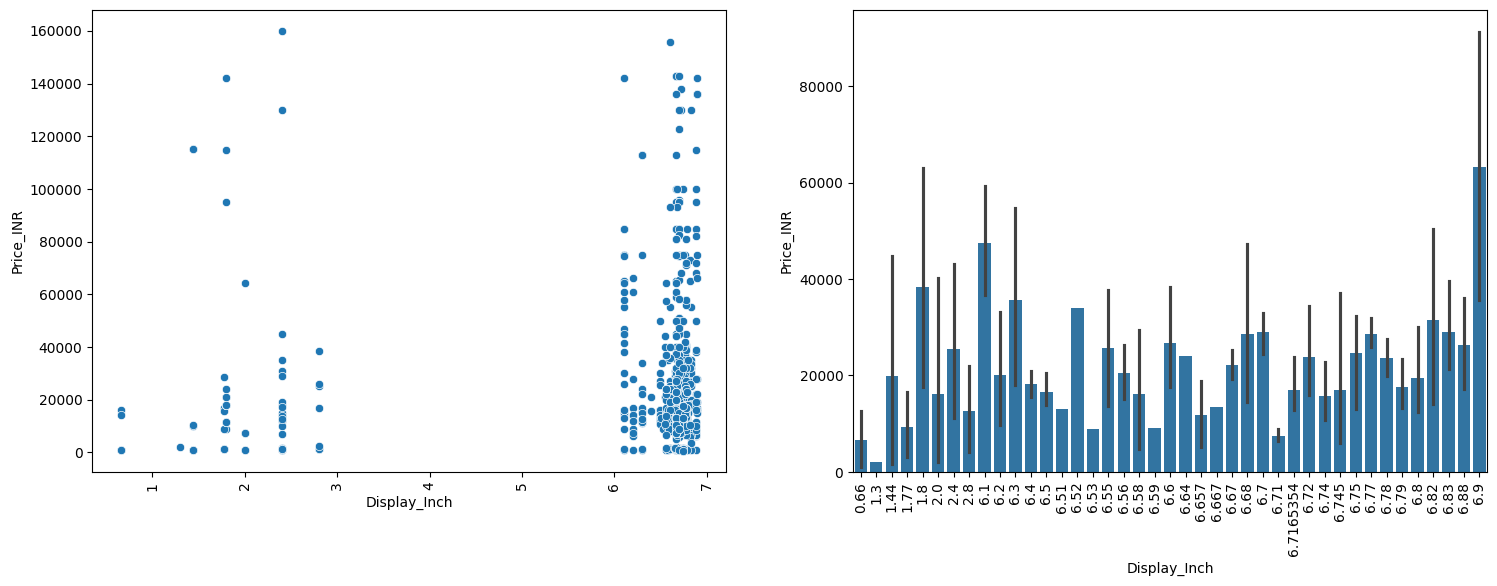

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x=df['Display_Inch'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)

sns.barplot(data=df, x="Display_Inch", y="Price_INR", ax=ax2)
ax2.tick_params(axis='x', rotation=90)

plt.show()

The Models with Display_Inch size < 3 inch and price >30 are outliers as these products have no cameras, RAM and ROM and still prices are higher. hence deleted

In [ ]:
df.drop(df[(df['Display_Inch'] < 3) & (df['Price_INR'] > 30000)].index, inplace=True)

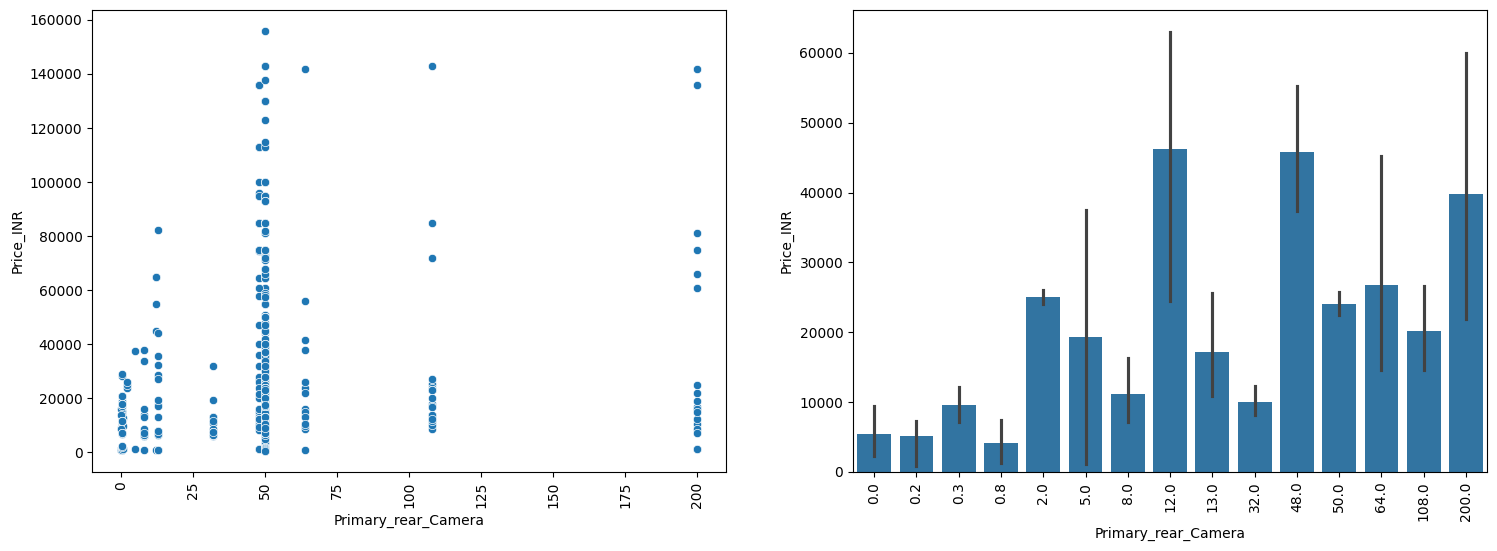

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


sns.scatterplot(x=df['Primary_rear_Camera'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)

sns.barplot(data=df, x="Primary_rear_Camera", y="Price_INR", ax=ax2)

ax2.tick_params(axis='x', rotation=90)

plt.show()

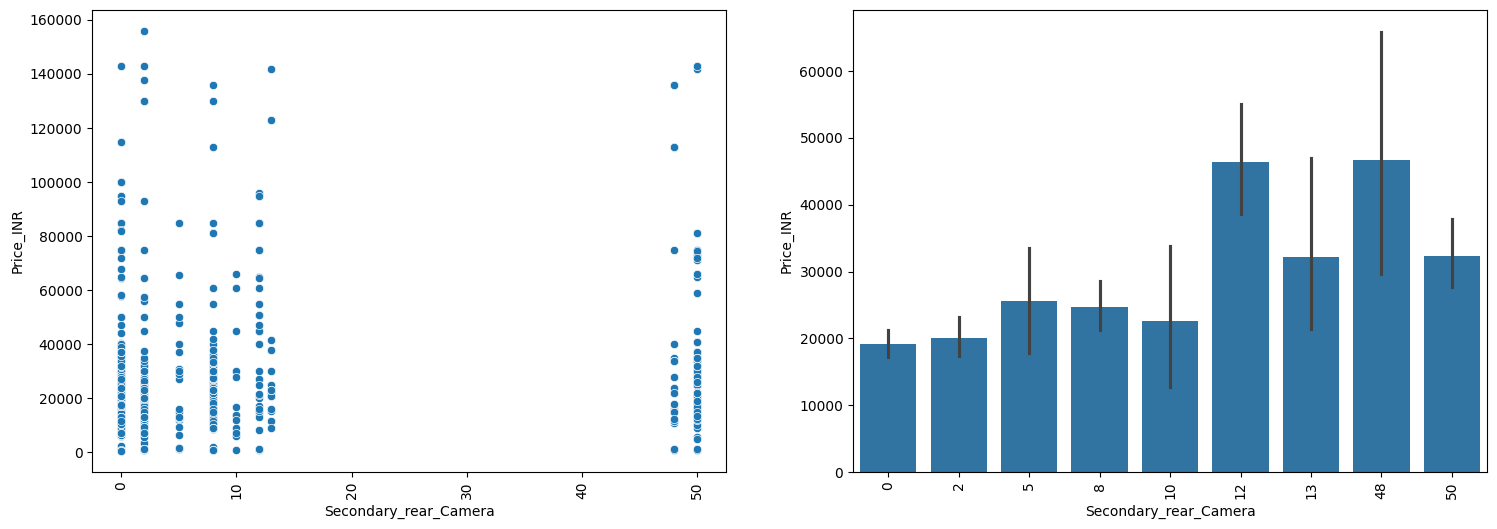

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


sns.scatterplot(x=df['Secondary_rear_Camera'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)


sns.barplot(data=df, x="Secondary_rear_Camera", y="Price_INR", ax=ax2)
#sns.scatterplot(x=df['Secondary_rear_Camera'],y=df['Price_INR'],ax=ax2)
ax2.tick_params(axis='x', rotation=90)

plt.show()

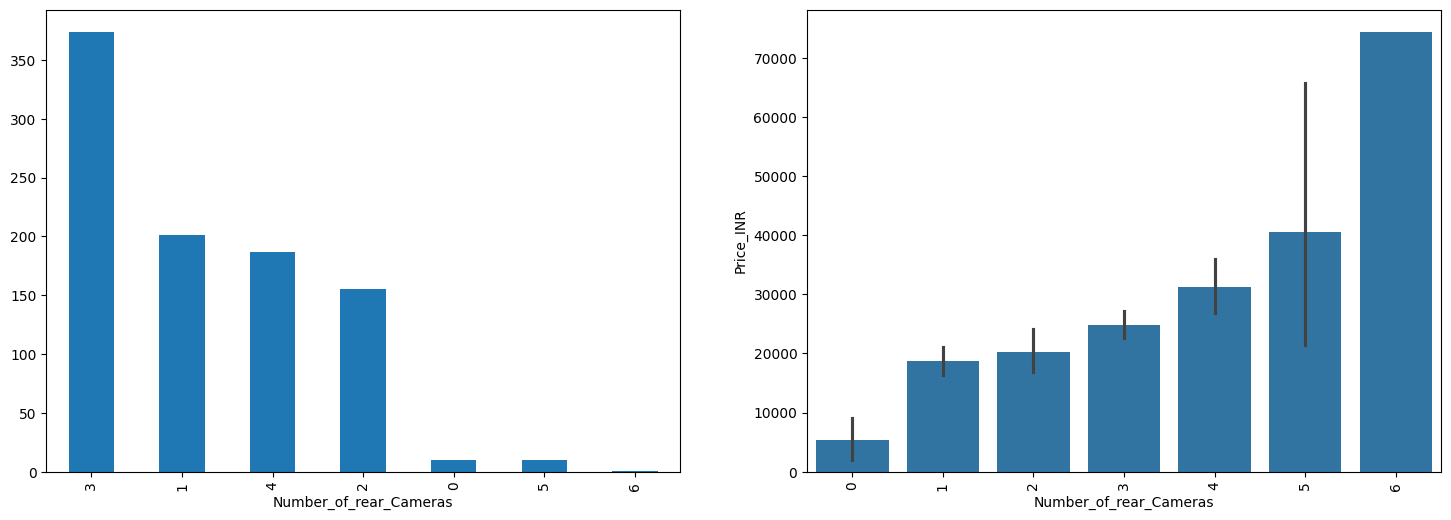

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df['Number_of_rear_Cameras'].value_counts().plot(kind='bar', ax=ax1)
ax1.tick_params(axis='x', rotation=90)


sns.barplot(data=df, x="Number_of_rear_Cameras", y="Price_INR", ax=ax2)
#sns.scatterplot(x=df['Number_of_rear_Cameras'],y=df['Price_INR'],ax=ax2)
ax2.tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
df = df[df['Number_of_rear_Cameras'] != 6]

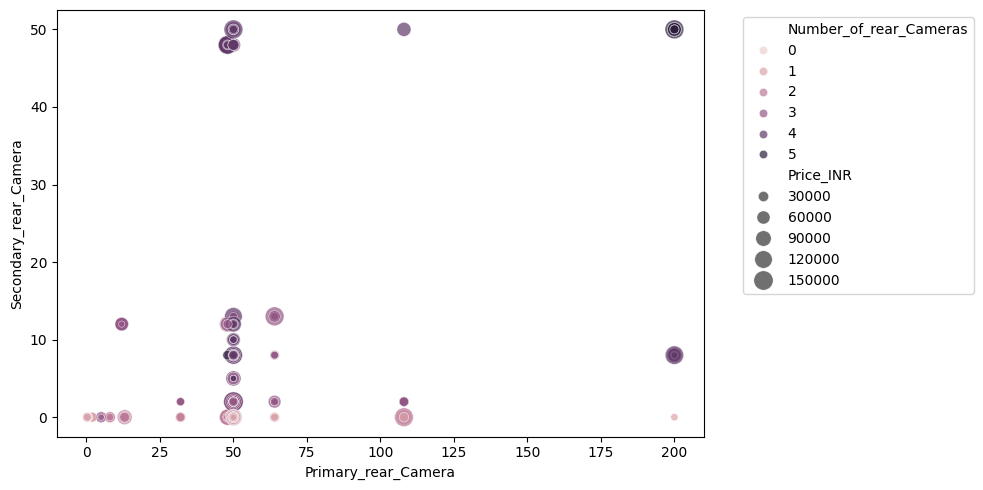

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Primary_rear_Camera', y='Secondary_rear_Camera',
                hue='Number_of_rear_Cameras', size='Price_INR', sizes=(20, 200), alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Axes: xlabel='sum_rear_cameras', ylabel='Price_INR'>

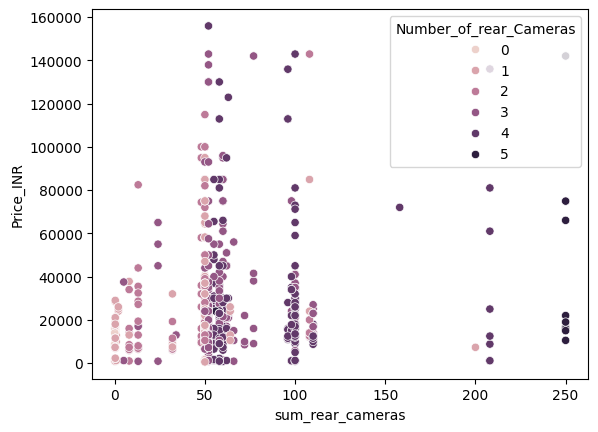

In [ ]:
df['sum_rear_cameras'] = df['Primary_rear_Camera'] + df['Secondary_rear_Camera']
sns.scatterplot(x=df['sum_rear_cameras'],y=df['Price_INR'],hue=df['Number_of_rear_Cameras'])

In [ ]:
df.drop(columns=['sum_rear_cameras'],inplace=True)

<Axes: xlabel='Mobile_RAM', ylabel='ROM'>

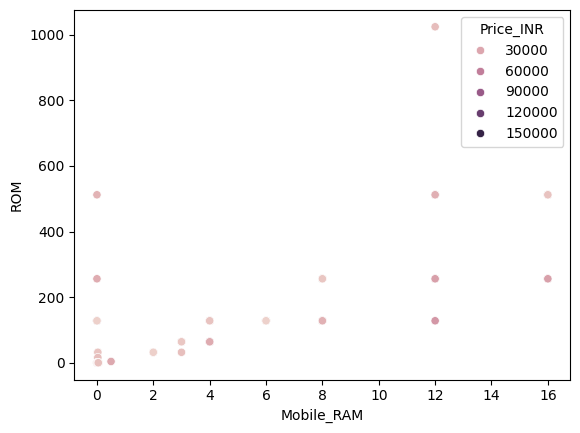

In [ ]:
sns.scatterplot(x=df['Mobile_RAM'],y=df['ROM'],hue=df['Price_INR'])

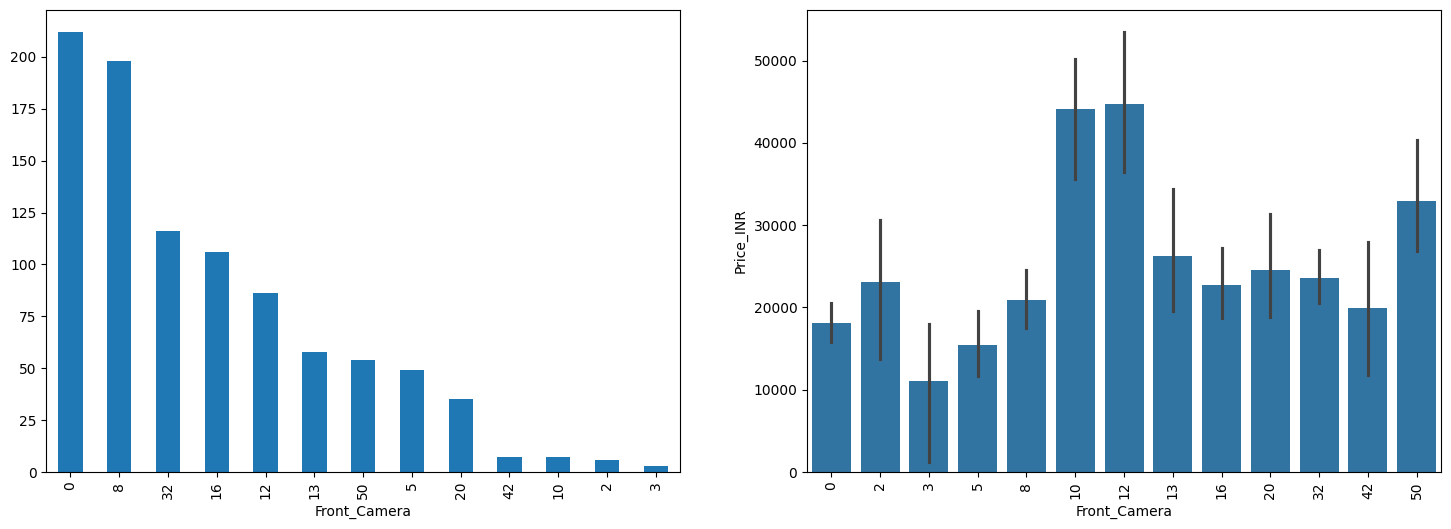

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df['Front_Camera'].value_counts().plot(kind='bar',ax=ax1)
ax1.tick_params(axis='x', rotation=90)


sns.barplot(data=df, x="Front_Camera", y="Price_INR", ax=ax2)
#sns.scatterplot(x=df['Secondary_rear_Camera'],y=df['Price_INR'],ax=ax2)
ax2.tick_params(axis='x', rotation=90)

plt.show()

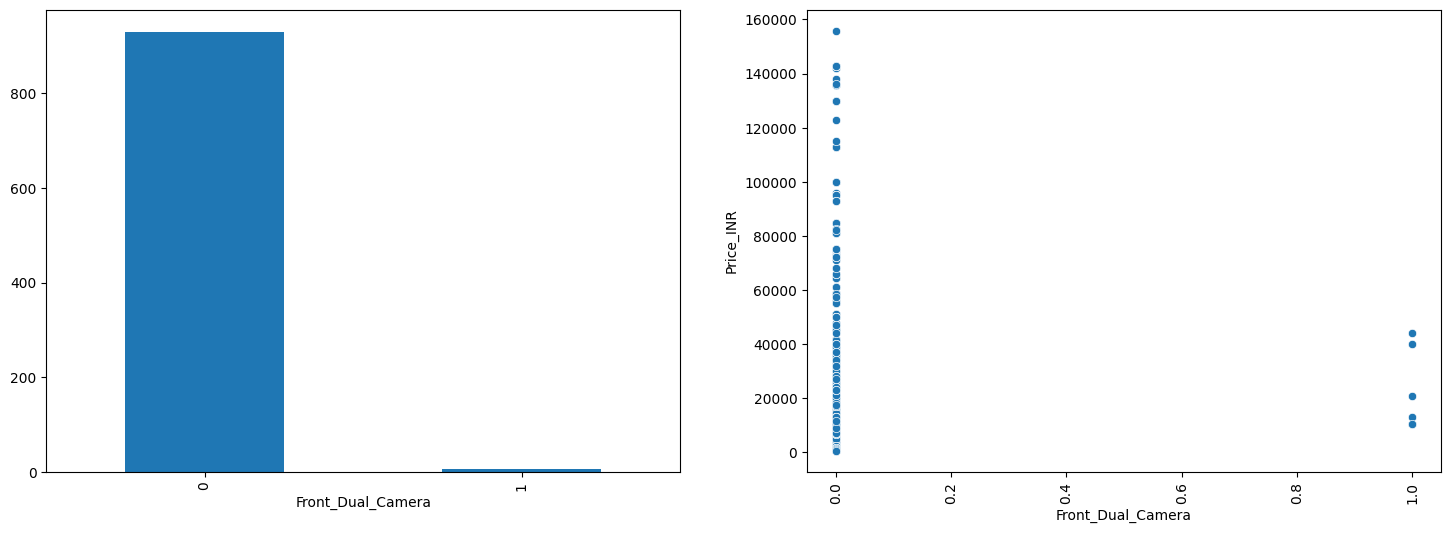

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df['Front_Dual_Camera'].value_counts().plot(kind='bar',ax=ax1)
ax1.tick_params(axis='x', rotation=90)


#sns.barplot(data=df, x="Front_Dual_Camera", y="Price_INR", ax=ax2)
sns.scatterplot(x=df["Front_Dual_Camera"],y=df['Price_INR'],ax=ax2)
ax2.tick_params(axis='x', rotation=90)

plt.show()

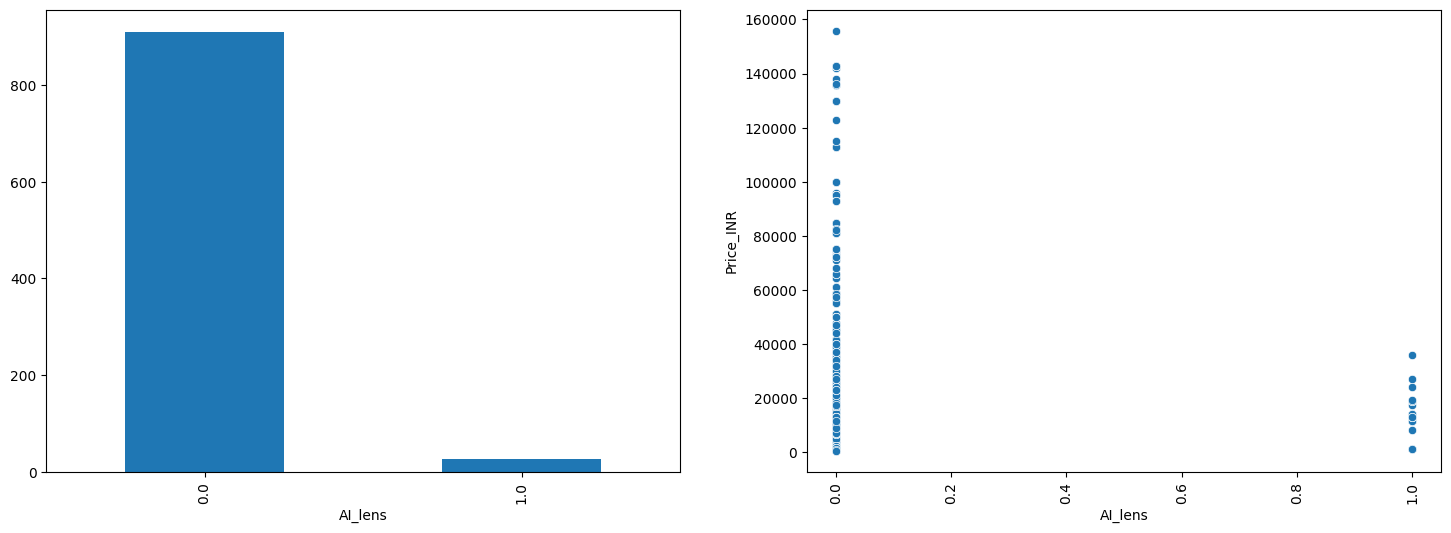

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df['AI_lens'].value_counts().plot(kind='bar',ax=ax1)
ax1.tick_params(axis='x', rotation=90)


#sns.barplot(data=df, x="AI_lens", y="Price_INR", ax=ax2)
sns.scatterplot(x=df['AI_lens'],y=df['Price_INR'],ax=ax2)
ax2.tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
print(df['Front_Dual_Camera'].value_counts(normalize=True))
print(df['AI_lens'].value_counts(normalize=True))


Front_Dual_Camera
0    0.993597
1    0.006403
Name: proportion, dtype: float64
AI_lens
0.0    0.972252
1.0    0.027748
Name: proportion, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 0 to 1007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Battery_Capacity        937 non-null    float64
 1   Processor               937 non-null    object 
 2   Original_Price          937 non-null    float64
 3   Discount_Percentage     937 non-null    float64
 4   Price_INR               937 non-null    float64
 5   Brand                   937 non-null    object 
 6   Model                   937 non-null    object 
 7   color                   937 non-null    object 
 8   Mobile_RAM              937 non-null    float64
 9   ROM                     937 non-null    float64
 10  Display_Inch            937 non-null    float64
 11  Primary_rear_Camera     937 non-null    float64
 12  Secondary_rear_Camera   937 non-null    int64  
 13  Number_of_rear_Cameras  937 non-null    int64  
 14  AI_lens                 937 non-null    float6

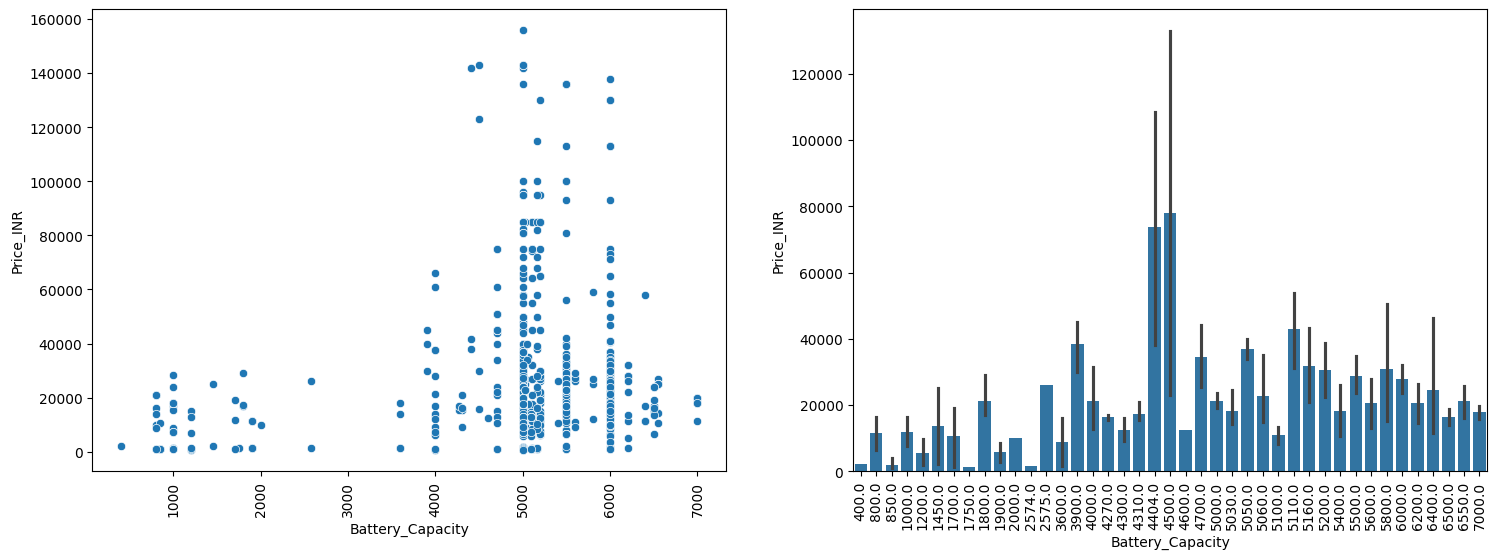

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


sns.scatterplot(x=df['Battery_Capacity'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)


sns.barplot(data=df, x='Battery_Capacity', y="Price_INR", ax=ax2)

ax2.tick_params(axis='x', rotation=90)

plt.show()

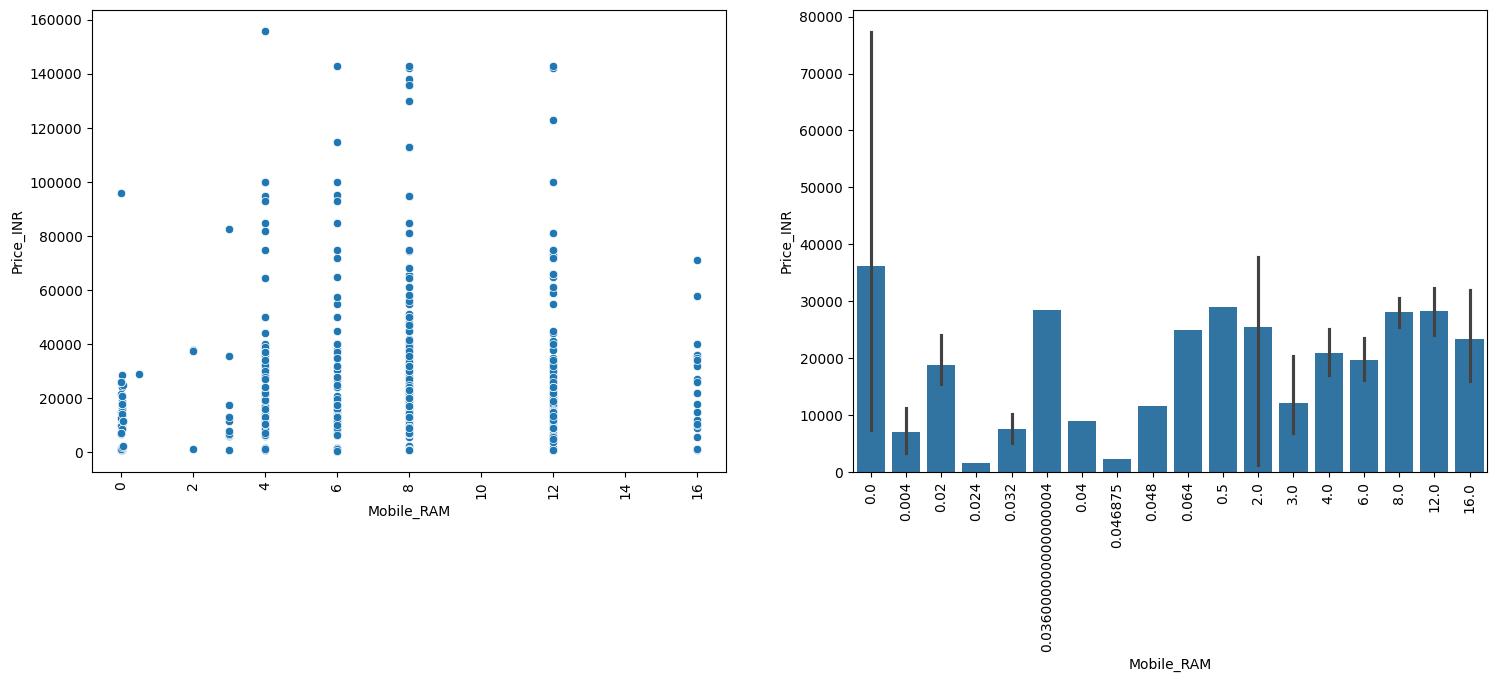

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


sns.scatterplot(x=df['Mobile_RAM'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)

sns.barplot(data=df, x="Mobile_RAM", y="Price_INR", ax=ax2)

ax2.tick_params(axis='x', rotation=90)

plt.show()

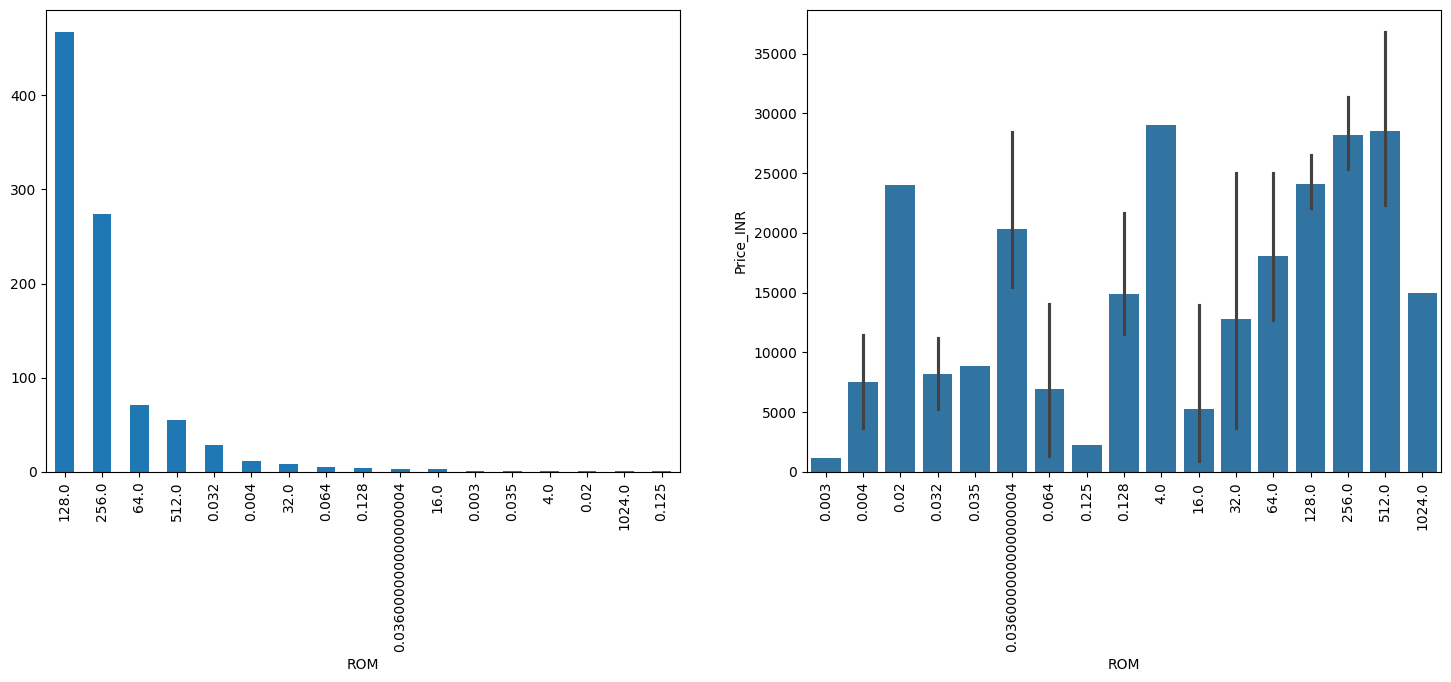

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df['ROM'].value_counts().plot(kind='bar',ax=ax1)

ax1.tick_params(axis='x', rotation=90)


sns.barplot(data=df, x="ROM", y="Price_INR", ax=ax2)

ax2.tick_params(axis='x', rotation=90)

plt.show()

ROM values with very few entries are removed

In [ ]:
values_to_remove = [16, 0.003, 0.035, 4.0,0.02,1024.0,0.125,0.036000000000000004]
df= df[~df['ROM'].isin(values_to_remove)]

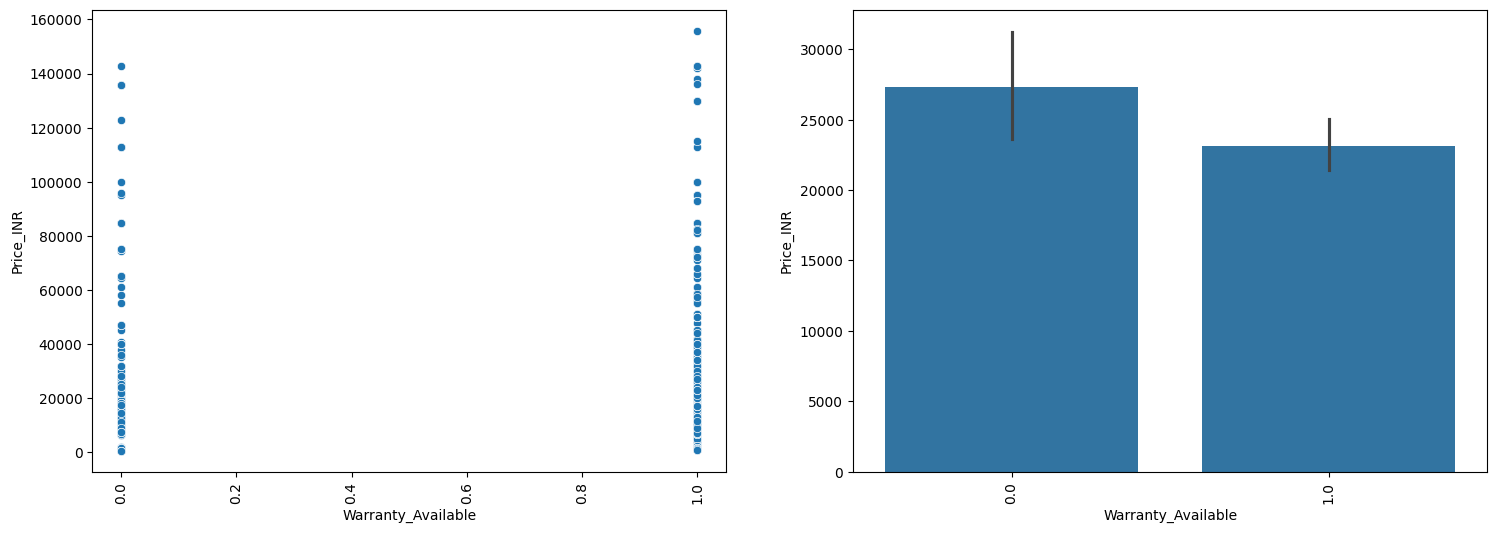

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


sns.scatterplot(x=df['Warranty_Available'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)

sns.barplot(data=df, x="Warranty_Available", y="Price_INR", ax=ax2)

ax2.tick_params(axis='x', rotation=90)

plt.show()

<Axes: xlabel='Warranty_Available'>

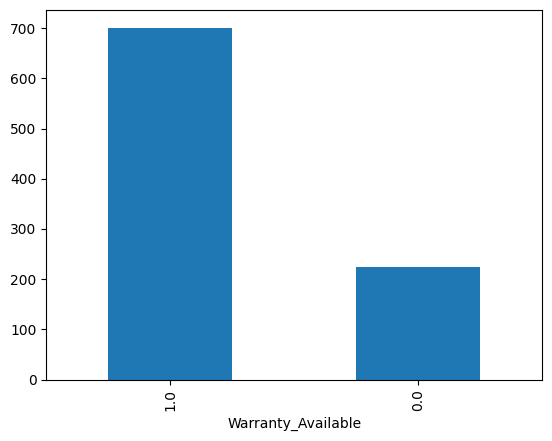

In [ ]:
df['Warranty_Available'].value_counts().plot(kind='bar')

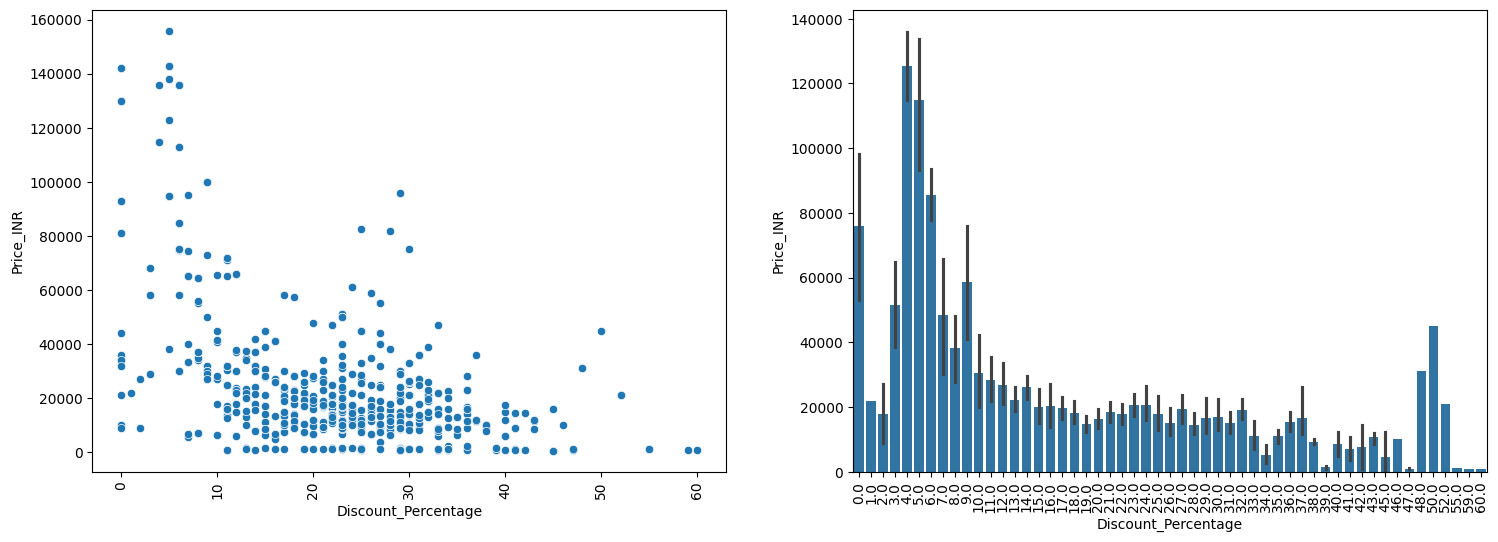

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x=df['Discount_Percentage'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)

sns.barplot(data=df, x='Discount_Percentage', y="Price_INR", ax=ax2)

ax2.tick_params(axis='x', rotation=90)

plt.show()

<Axes: xlabel='Discount_Percentage'>

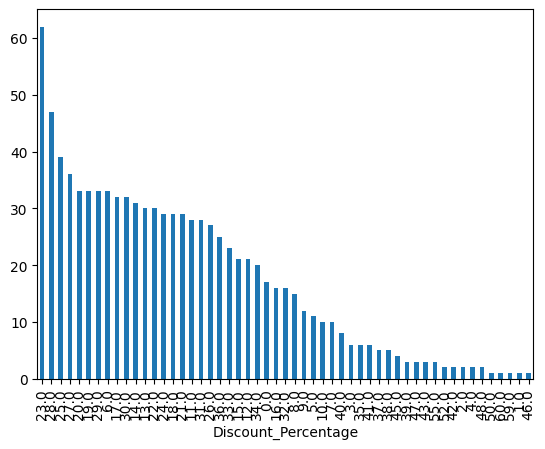

In [ ]:
df['Discount_Percentage'].value_counts().plot(kind='bar')

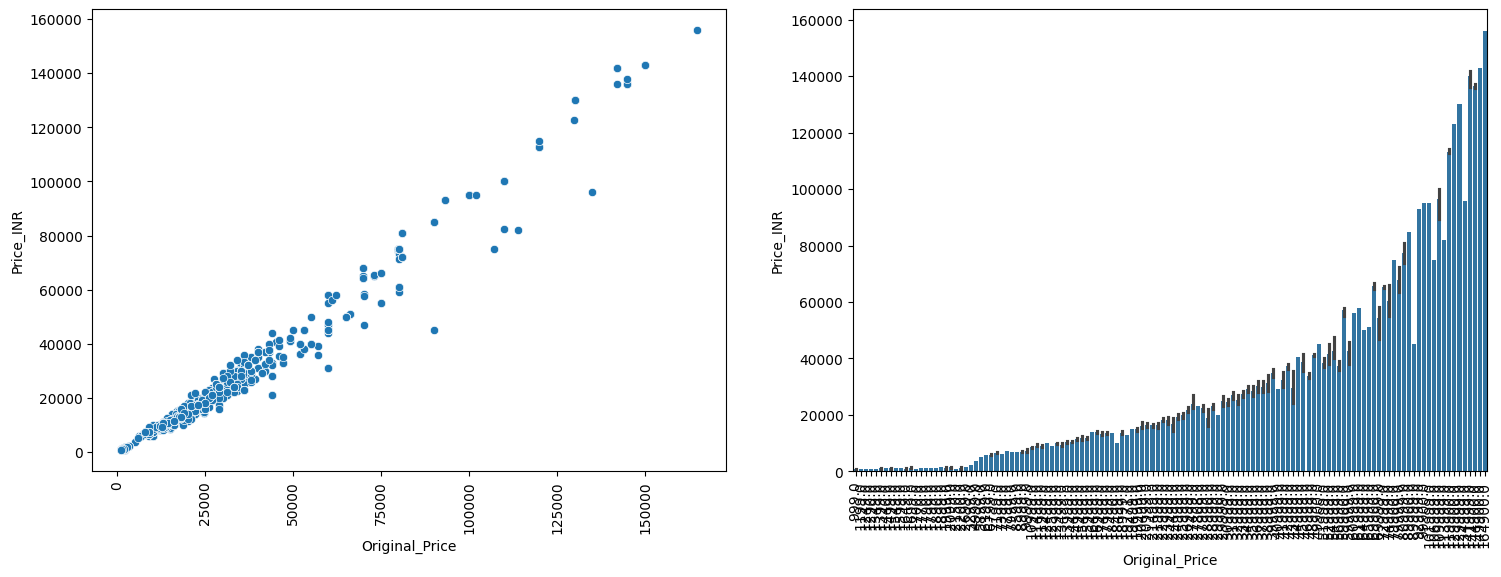

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x=df['Original_Price'],y=df['Price_INR'],ax=ax1)
ax1.tick_params(axis='x', rotation=90)

sns.barplot(data=df, x='Original_Price', y="Price_INR", ax=ax2)

ax2.tick_params(axis='x', rotation=90)

plt.show()

Since original price and Price_INR (after discount) are highly correlated , it has higher influence in model tuning, it needs to be removed as our objective is to predict prices based on mobile brands and features

In [ ]:
df.drop(columns=['Original_Price'],inplace=True)

In [ ]:
df['Model'].unique()

array(['Essential_4G', 'Core_5G', 'Midrange_Pro', 'Smart_Value_Plus',
       'Feature_Phone', 'Essential_5G', 'Midrange_Core', 'Entry_Storage',
       'Premium_Classic', 'Gaming_Edition', 'Ultra_Premium',
       'Entry_Basic'], dtype=object)

<Axes: >

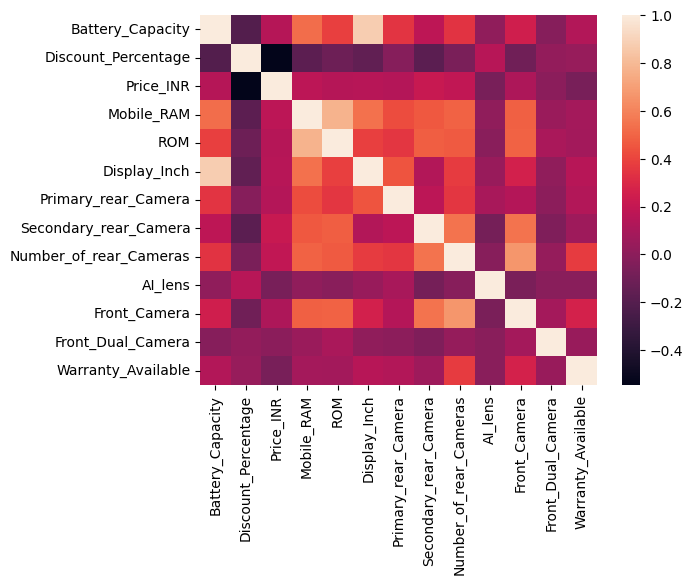

In [ ]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr())

In [ ]:
np.log(df['Price_INR'])

,Price_INR
0,10.126591
1,9.615739
2,8.699348
3,9.546741
4,10.043206
...,...
1002,10.043206
1004,9.798071
1005,9.769899
1006,6.308098


### Model Building

### Train test split :

In [ ]:
X = df.drop(columns=['Price_INR','Discount_Percentage','color'])
y = np.log(df['Price_INR'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 1007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Battery_Capacity        925 non-null    float64
 1   Processor               925 non-null    object 
 2   Discount_Percentage     925 non-null    float64
 3   Price_INR               925 non-null    float64
 4   Brand                   925 non-null    object 
 5   Model                   925 non-null    object 
 6   color                   925 non-null    object 
 7   Mobile_RAM              925 non-null    float64
 8   ROM                     925 non-null    float64
 9   Display_Inch            925 non-null    float64
 10  Primary_rear_Camera     925 non-null    float64
 11  Secondary_rear_Camera   925 non-null    int64  
 12  Number_of_rear_Cameras  925 non-null    int64  
 13  AI_lens                 925 non-null    float64
 14  Front_Camera            925 non-null    int64 

###8. Model Evaluation

Evaluate using MAE and R² Score

Comparing models and to check which model performs best

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =42)

Installing category_encoders library to use Target encoder function for few of the categories

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin
import category_encoders as ce

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 925 entries, 0 to 1007
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Battery_Capacity        925 non-null    float64
 1   Processor               925 non-null    object 
 2   Brand                   925 non-null    object 
 3   Model                   925 non-null    object 
 4   Mobile_RAM              925 non-null    float64
 5   ROM                     925 non-null    float64
 6   Display_Inch            925 non-null    float64
 7   Primary_rear_Camera     925 non-null    float64
 8   Secondary_rear_Camera   925 non-null    int64  
 9   Number_of_rear_Cameras  925 non-null    int64  
 10  AI_lens                 925 non-null    float64
 11  Front_Camera            925 non-null    int64  
 12  Front_Dual_Camera       925 non-null    int64  
 13  Warranty_Available      925 non-null    float64
dtypes: float64(7), int64(4), object(3)
memory usag

In [ ]:
#cat_cols = [1, 2, 3]
#num_cols = [0, 4, 5, 6, 7,8,9, 10, 11, 12, 13]

In [ ]:
# Wrapper for TargetEncoder to use in ColumnTransformer
class TargetEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = ce.TargetEncoder()

    def fit(self, X, y):
        self.encoder.fit(X, y)
        return self

    def transform(self, X):
        return self.encoder.transform(X)

# Specify the column indices
brand_col = ['Brand']
cat_other_cols = ['Processor','Model']
num_cols = ['Battery_Capacity', 'Mobile_RAM', 'ROM', 'Display_Inch', 'Primary_rear_Camera', 'Secondary_rear_Camera', 'Number_of_rear_Cameras', 'AI_lens', 'Front_Camera', 'Front_Dual_Camera', 'Warranty_Available']

ColumnTransformer
step1 = ColumnTransformer([
    ('model_target_enc', TargetEncoderWrapper(), brand_col),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_other_cols),
    ('num', StandardScaler(), num_cols)
])

### Linear Regression

In [ ]:
# Step 2: Model
step2 = LinearRegression()

# Step 3: Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Grid search with 5-fold cross-validation
param_grid = {}  # No hyperparameters to tune for LinearRegression
step3 = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Step 5: Fit and evaluate
step3.fit(X_train, y_train)
y_pred = step3.predict(X_test)

# Get average MAE over folds and evaluate with R2
print("Avg MAE over 5 folds:", -step3.best_score_)  # Convert from negative to positive

print("MAE on test data:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Avg MAE over 5 folds: 0.4804554766305803
MAE on test data: 0.46397618928630385
R2 Score: 0.54318317261868


### Ridge Regression

Best alpha: 1.0
Avg MAE over 5 folds: 0.4800346065590949
MAE on test data: 0.4643587053346135
R2 Score: 0.5435566818836387


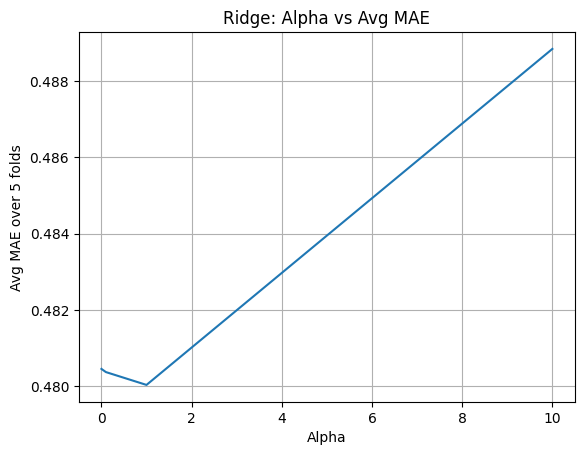

In [ ]:
# Step 2: Ridge Model
step2 = Ridge()

# Step 3: Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Grid search with alpha hyperparameter tuning using 5-fold cross-validation
param_grid = {'step2__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}  # Range of alpha values for Ridge
step3 = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Step 5: Fit and evaluate
step3.fit(X_train, y_train)
y_pred = step3.predict(X_test)

# Get average MAE over folds and evaluate with R2
print("Best alpha:", step3.best_params_['step2__alpha'])
print("Avg MAE over 5 folds:", -step3.best_score_)  # Convert from negative to positive
print("MAE on test data:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

sns.lineplot(x=step3.cv_results_['param_step2__alpha'], y=-step3.cv_results_['mean_test_score'])
plt.xlabel('Alpha'),plt.ylabel('Avg MAE over 5 folds'),plt.title('Ridge: Alpha vs Avg MAE'),plt.grid(True)
plt.show()

### Lasso Regression

best_alpha : 0.001
average_MAE_over_5_folds : 0.48015232725137647
MAE on test data : 0.4632983264533003
R2 score : 0.5450778342722045


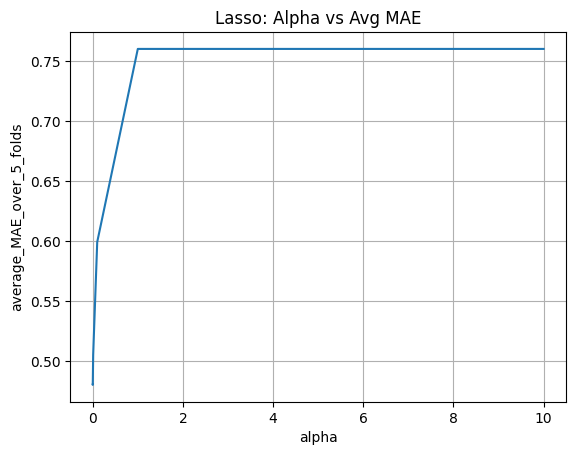

In [ ]:
step2 = Lasso(max_iter=10000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

param_grid = {'step2__alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}

step3 = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

step3.fit(X_train,y_train)
y_pred = step3.predict(X_test)

print('best_alpha :', step3.best_params_['step2__alpha'])
print('average_MAE_over_5_folds :', -step3.best_score_)
print('MAE on test data :', mean_absolute_error(y_test,y_pred))
print('R2 score :', r2_score(y_test,y_pred))

sns.lineplot(x=step3.cv_results_['param_step2__alpha'],y=-step3.cv_results_['mean_test_score'])
plt.xlabel('alpha'),plt.ylabel('average_MAE_over_5_folds'),plt.title('Lasso: Alpha vs Avg MAE'),plt.grid(True)
plt.show()

### ElasticNet

best_params : {'step2__alpha': 0.001, 'step2__l1_ratio': 0.5}
average_MAE_over_5_folds : 0.4798278913382945
MAE on test data : 0.46393291528497077
R2 score : 0.5442144360072942


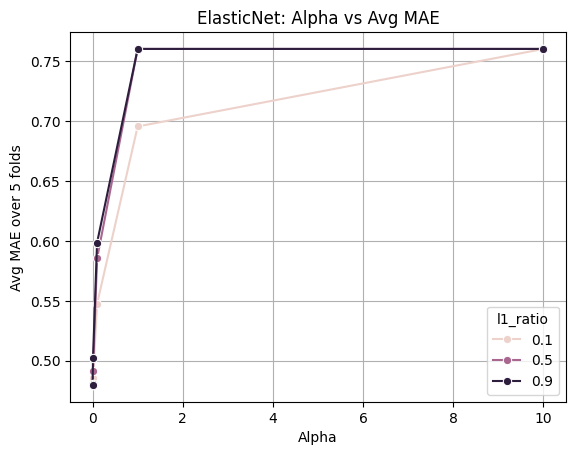

In [ ]:
step2 = ElasticNet(max_iter=10000)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

param_grid = {'step2__alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10], 'step2__l1_ratio': [0.1, 0.5, 0.9]}

step3 = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

step3.fit(X_train,y_train)
y_pred = step3.predict(X_test)

print('best_params :', step3.best_params_)
print('average_MAE_over_5_folds :', -step3.best_score_)
print('MAE on test data :', mean_absolute_error(y_test,y_pred))
print('R2 score :', r2_score(y_test,y_pred))

results_df = pd.DataFrame(step3.cv_results_)
results_df['alpha'] = results_df['param_step2__alpha']
results_df['l1_ratio'] = results_df['param_step2__l1_ratio']
results_df['avg_mae'] = -results_df['mean_test_score']  # Convert to positive MAE
sns.lineplot(data=results_df, x='alpha', y='avg_mae', hue='l1_ratio', marker='o')
plt.xlabel("Alpha"),plt.ylabel("Avg MAE over 5 folds"),plt.title("ElasticNet: Alpha vs Avg MAE"),plt.grid(True)
plt.show()

KNN

best_n_neighbors : 10
average_MAE_over_5_folds : 0.611973636119329
MAE on test data : 0.6057768762040524
R2 score : 0.2741200347620133


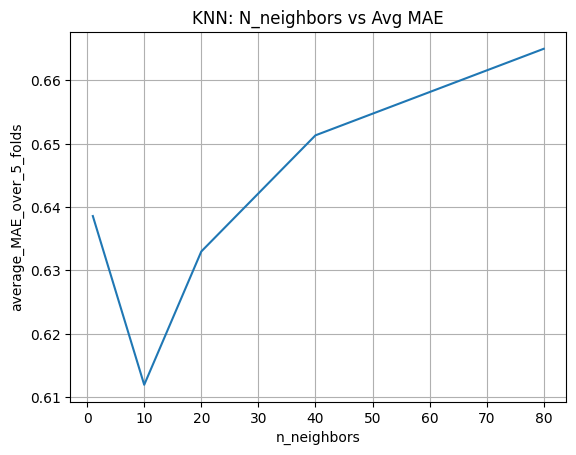

In [ ]:

step2 = KNeighborsRegressor(p=1)

pipe = Pipeline([
    ('step1',step1),
     ('step2',step2)
     ])

param_grid = {'step2__n_neighbors':[1,10,20,40,80]}

step3 = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

step3.fit(X_train,y_train)
y_pred = step3.predict(X_test)

print('best_n_neighbors :', step3.best_params_['step2__n_neighbors'])
print('average_MAE_over_5_folds :', -step3.best_score_)
print('MAE on test data :', mean_absolute_error(y_test,y_pred))
print('R2 score :', r2_score(y_test,y_pred))

sns.lineplot(x=step3.cv_results_['param_step2__n_neighbors'],y=-step3.cv_results_['mean_test_score'])
plt.xlabel('n_neighbors'),plt.ylabel('average_MAE_over_5_folds'),plt.title('KNN: N_neighbors vs Avg MAE'),plt.grid(True)
plt.show()



hyperparameters :
- k = 10 is showing better results
- p=1 (manhattan distance) is showing better results than p=2 (euclidean) hence it is used
- weights = 'distance'(more weightage to neighbors did not show improvement in results

### Decision Tree

best_max_depth: 15
average_MAE_over_5_folds: 0.42551674647665355
MAE on test data: 0.31544654208337547
R2 score: 0.6219040094784334


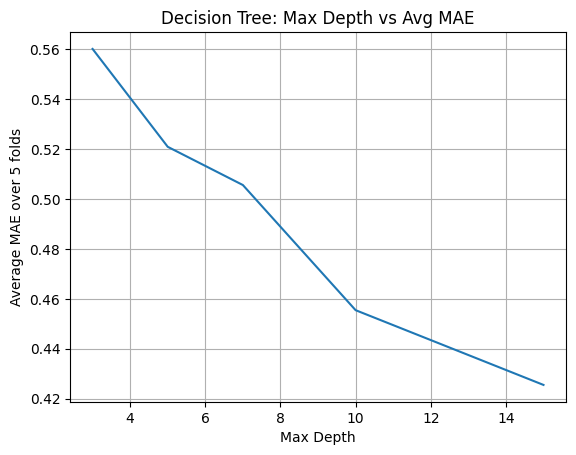

In [ ]:

step2 = DecisionTreeRegressor(random_state=42)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

param_grid = {'step2__max_depth':[3,5,7,10,15,None]}

step3 = GridSearchCV(pipe,param_grid=param_grid,cv=5,scoring='neg_mean_absolute_error',n_jobs=-1)

step3.fit(X_train,y_train)
y_pred = step3.predict(X_test)

print('best_max_depth:', step3.best_params_['step2__max_depth'])
print('average_MAE_over_5_folds:', -step3.best_score_)
print('MAE on test data:', mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

# Plot
sns.lineplot(x=step3.cv_results_['param_step2__max_depth'], y=-step3.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel('Average MAE over 5 folds')
plt.title('Decision Tree: Max Depth vs Avg MAE')
plt.grid(True)
plt.show()


### Random Forest

best_params: {'step2__max_depth': None, 'step2__n_estimators': 250}
average_MAE_over_5_folds: 0.3847480824038433
MAE on test data: 0.2983117944499839
R2 score: 0.7489839182660007


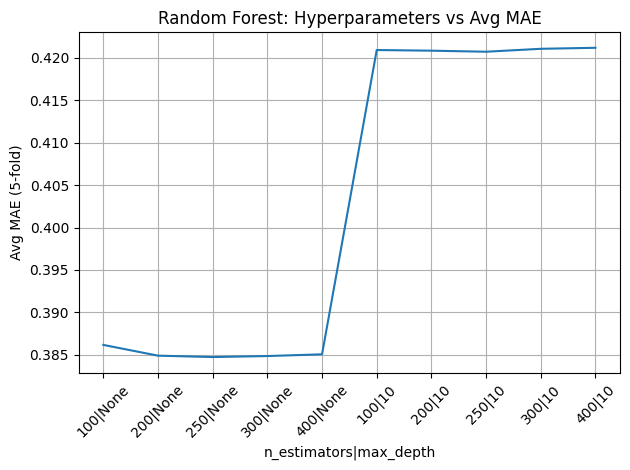

In [ ]:
# Step 2: Model
step2 = RandomForestRegressor(random_state=42)

# Step 3: Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Parameter Grid
param_grid = {
    'step2__n_estimators': [100,200,250,300,400],
    'step2__max_depth': [None,10]
}

# Step 5: GridSearchCV
step3 = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
step3.fit(X_train, y_train)
y_pred = step3.predict(X_test)

# Step 6: Results
print('best_params:', step3.best_params_)
print('average_MAE_over_5_folds:', -step3.best_score_)
print('MAE on test data:', mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

# Step 7: Plotting
sns.lineplot(
    x=[f"{a}|{b}" for a, b in zip(step3.cv_results_['param_step2__n_estimators'], step3.cv_results_['param_step2__max_depth'])],
    y=-step3.cv_results_['mean_test_score']
)
plt.xticks(rotation=45)
plt.xlabel('n_estimators|max_depth')
plt.ylabel('Avg MAE (5-fold)')
plt.title('Random Forest: Hyperparameters vs Avg MAE')
plt.grid(True)
plt.tight_layout()
plt.show()

Other tuning parameters like min_sample_split and max_features are also tried. However, did not show any improvement in results.


Individual Feature Importances (Including OHE Categories):
                      Transformed_Feature        Original_Feature  Importance
0                                   Brand                   Brand    0.513745
28                           Display_Inch            Display_Inch    0.052471
26                             Mobile_RAM              Mobile_RAM    0.047759
25                       Battery_Capacity        Battery_Capacity    0.038348
21                     Model_Midrange_Pro                   Model    0.035333
16                     Model_Essential_4G                   Model    0.033274
33                           Front_Camera            Front_Camera    0.028557
22                  Model_Premium_Classic                   Model    0.024295
29                    Primary_rear_Camera     Primary_rear_Camera    0.021785
30                  Secondary_rear_Camera   Secondary_rear_Camera    0.020828
35                     Warranty_Available      Warranty_Available    0.019947
31  

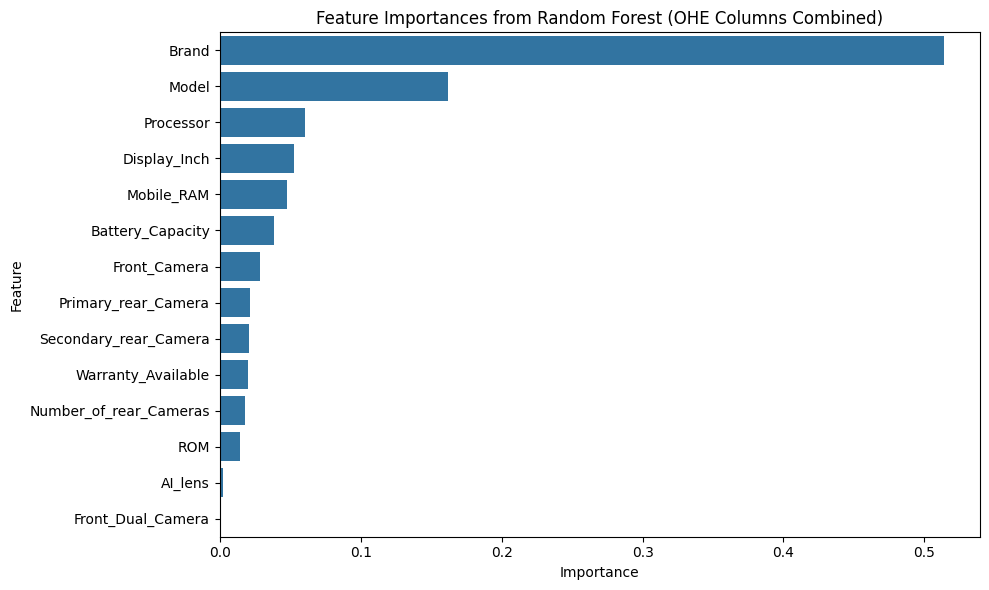

In [ ]:
# Step 8: Feature Importance with Individual and Combined OHE Columns
# Get the best model from GridSearchCV
best_model = step3.best_estimator_

# Extract the RandomForestRegressor from the pipeline
rf_model = best_model.named_steps['step2']

# Extract the ColumnTransformer
transformer = best_model.named_steps['step1']

# Get the feature importances from the RandomForestRegressor
feature_importances = rf_model.feature_importances_

# Get the transformed feature names
# 1. Target-encoded "Brand" column
brand_feature_names = ['Brand']

# 2. One-hot encoded categorical columns (indices 1 and 3: Processor and Model)
cat_encoder = transformer.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(['Processor', 'Model'])

# 3. Numerical columns
num_feature_names = num_cols

# Combine all transformed feature names in the order they were transformed
all_transformed_feature_names = brand_feature_names + list(cat_feature_names) + num_feature_names

# Ensure the number of feature names matches the number of feature importances
assert len(all_transformed_feature_names) == len(feature_importances), "Mismatch between feature names and importances"

# Step 9: Compute Individual and Combined Feature Importances
# Create a mapping from transformed feature names to original column names for aggregation
feature_to_original = []

# Target-encoded "Brand" column (1 feature)
feature_to_original.extend([(name, 'Brand') for name in brand_feature_names])

# One-hot encoded categorical columns (Processor and Model)
for transformed_name in cat_feature_names:
    original_col = transformed_name.split('_', 1)[0]  # e.g., "Processor_Snapdragon" -> "Processor"
    feature_to_original.append((transformed_name, original_col))

# Numerical columns (unchanged)
feature_to_original.extend([(name, name) for name in num_feature_names])

# Create a DataFrame of transformed (individual) features and their importances
individual_importance_df = pd.DataFrame({
    'Transformed_Feature': all_transformed_feature_names,
    'Original_Feature': [pair[1] for pair in feature_to_original],
    'Importance': feature_importances
})

# Sort individual importances
individual_importance_df = individual_importance_df.sort_values(by='Importance', ascending=False)

# Aggregate importances by original feature (sum the importances for OHE columns)
combined_importance_df = individual_importance_df.groupby('Original_Feature')['Importance'].sum().reset_index()

# Sort combined importances
combined_importance_df = combined_importance_df.sort_values(by='Importance', ascending=False)

# Step 10: Display Results
print("\nIndividual Feature Importances (Including OHE Categories):")
print(individual_importance_df)

print("\nAggregated Feature Importances (OHE Columns Combined):")
print(combined_importance_df)

# Step 11: Plot Combined Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Original_Feature', data=combined_importance_df)
plt.title('Feature Importances from Random Forest (OHE Columns Combined)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cramers_v_score = cramers_v(X_train['Model'], X_train['Brand'])
print(f"Cramér's V between Model and Brand: {cramers_v_score:.3f}")


Cramér's V between Model and Brand: 0.493


### Gradient Boosting

Best Params: {'step2__learning_rate': 0.1, 'step2__max_depth': 10, 'step2__min_samples_split': 2, 'step2__n_estimators': 600}
Avg MAE over 5 folds: 0.3751911104494897
MAE on Test Data: 0.2975202838590236
R2 Score: 0.7056802184125116


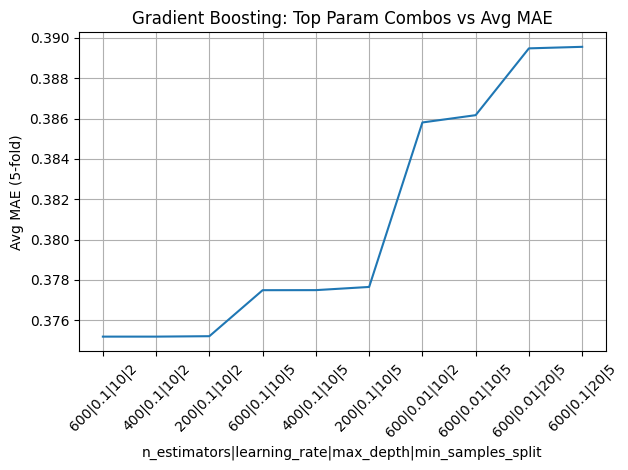

In [ ]:
# Step 2: Model
step2 = GradientBoostingRegressor(random_state=42)

# Step 3: Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Parameter Grid
param_grid = {
    'step2__n_estimators': [200, 400, 600],
    'step2__learning_rate': [0.01, 0.1, 1],
    'step2__max_depth': [3,5,10,20],
    'step2__min_samples_split': [2,5,10]
}

# Step 5: GridSearchCV
step3 = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
step3.fit(X_train, y_train)
y_pred = step3.predict(X_test)

# Step 6: Evaluation
print('Best Params:', step3.best_params_)
print('Avg MAE over 5 folds:', -step3.best_score_)
print('MAE on Test Data:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Step 7: Optional Plot (Top 10)
results = step3.cv_results_
top_10_idx = results['rank_test_score'].argsort()[:10]
x_labels = [f"{results['param_step2__n_estimators'][i]}|{results['param_step2__learning_rate'][i]}|{results['param_step2__max_depth'][i]}|{results['param_step2__min_samples_split'][i]}" for i in top_10_idx]
y_vals = [-results['mean_test_score'][i] for i in top_10_idx]

sns.lineplot(x=x_labels, y=y_vals)
plt.xticks(rotation=45)
plt.xlabel('n_estimators|learning_rate|max_depth|min_samples_split')
plt.ylabel('Avg MAE (5-fold)')
plt.title('Gradient Boosting: Top Param Combos vs Avg MAE')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'Category' is in X_test
categories = X_test['Model'].unique()
for cat in categories:
    mask = X_test['Model'] == cat
    y_test_cat = y_test[mask]
    y_pred_cat = y_pred[mask]
    mae = mean_absolute_error(np.exp(y_test_cat), np.exp(y_pred_cat))
    r2 = r2_score(np.exp(y_test_cat), np.exp(y_pred_cat))
    print(f"Category: {cat}, MAE (INR): {mae}, R2: {r2}")

Category: Entry_Basic, MAE (INR): 3940.187189833556, R2: -15.11590027833488
Category: Entry_Storage, MAE (INR): 1922.2750207393144, R2: -0.9613248563376251
Category: Smart_Value_Plus, MAE (INR): 1611.4656136414083, R2: 0.40781239475499476
Category: Midrange_Pro, MAE (INR): 4988.607606002243, R2: 0.26868982906828
Category: Core_5G, MAE (INR): 5764.893545966482, R2: 0.0573029196290713
Category: Essential_4G, MAE (INR): 5254.4406192589395, R2: 0.5849440132870501
Category: Midrange_Core, MAE (INR): 7523.127844088195, R2: -1.985177582306402
Category: Ultra_Premium, MAE (INR): 28117.37452311198, R2: -1.2290690389068892
Category: Premium_Classic, MAE (INR): 11177.96739640974, R2: 0.56202255917011
Category: Gaming_Edition, MAE (INR): 4064.57744613279, R2: 0.5510716631029037
Category: Essential_5G, MAE (INR): 3812.6201556693145, R2: -0.19939082557938326
Category: Feature_Phone, MAE (INR): 583.965144370016, R2: 0.9894418432177912


Observations :
- n_estimators : above 400 showing not much improvement
- learning rate : 0.1 is working well. above or below shows degradation
- max_depth : 5 is working well. above or below shows degradation
- min_sample_split : 2 is working well. above or below shows degradation


### XGBoost

Best Params: {'step2__alpha': 0.1, 'step2__lambda': 0, 'step2__learning_rate': 0.1, 'step2__max_depth': 15, 'step2__n_estimators': 400, 'step2__subsample': 0.8}
Avg MAE over 5 folds: 0.37491021924752255
MAE on Test Data: 0.28028567966589263
R2 Score: 0.725512895441867


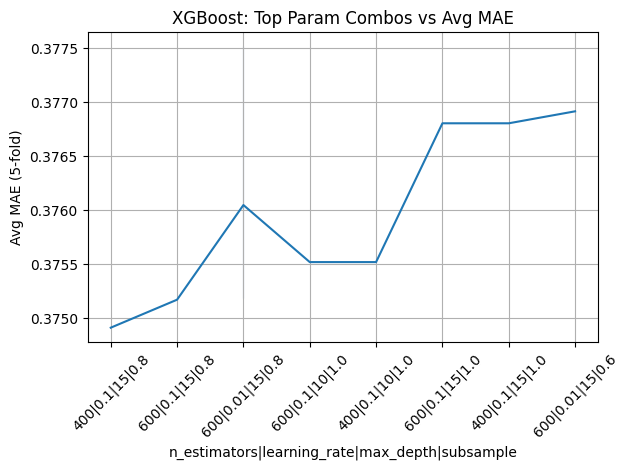

In [ ]:
# Step 2: Model
step2 = XGBRegressor(random_state=42, verbosity=0)

# Step 3: Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Step 4: Hyperparameter grid
param_grid = {
    'step2__n_estimators': [400,600],
    'step2__learning_rate': [0.01,0.1,1],
    'step2__max_depth': [5,10,15],
    'step2__subsample': [0.6,0.8,1.0],
 #   'step2__scale_pos_weight': [1, 5, 9],
    'step2__lambda': [0, 1, 2],  # L2 regularization
    'step2__alpha': [0, 0.1, 1]  # L1 regularization
}

# Step 5: Grid Search
step3 = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                     scoring='neg_mean_absolute_error', n_jobs=-1)
step3.fit(X_train, y_train)
y_pred = step3.predict(X_test)

# Step 6: Evaluation
print('Best Params:', step3.best_params_)
print('Avg MAE over 5 folds:', -step3.best_score_)
print('MAE on Test Data:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Step 7: Plot (Top 10)
results = step3.cv_results_
top_10_idx = results['rank_test_score'].argsort()[:10]
x_labels = [f"{results['param_step2__n_estimators'][i]}|{results['param_step2__learning_rate'][i]}|{results['param_step2__max_depth'][i]}|{results['param_step2__subsample'][i]}" for i in top_10_idx]
y_vals = [-results['mean_test_score'][i] for i in top_10_idx]

sns.lineplot(x=x_labels, y=y_vals)
plt.xticks(rotation=45)
plt.xlabel('n_estimators|learning_rate|max_depth|subsample')
plt.ylabel('Avg MAE (5-fold)')
plt.title('XGBoost: Top Param Combos vs Avg MAE')
plt.grid(True)
plt.tight_layout()
plt.show()


Observations :
- n_estimators : above 600 showing no significant improvement
- learning_rate : 0.01 is working well
- max_depth : 15 is working well. Above or below not much improvement
- subsample : 0.6 is working well.


Individual Feature Importances (Including OHE Categories):
                      Transformed_Feature        Original_Feature  Importance
0                                   Brand                   Brand    0.143212
22                  Model_Premium_Classic                   Model    0.086422
4                 Processor_Google_Tensor               Processor    0.069279
16                     Model_Essential_4G                   Model    0.050452
24                    Model_Ultra_Premium                   Model    0.049024
21                     Model_Midrange_Pro                   Model    0.039284
6      Processor_MediaTek_Dimensity_Basic               Processor    0.035827
30                  Secondary_rear_Camera   Secondary_rear_Camera    0.034913
11             Processor_Snapdragon_Basic               Processor    0.034552
18                    Model_Feature_Phone                   Model    0.033994
31                 Number_of_rear_Cameras  Number_of_rear_Cameras    0.030018
8   

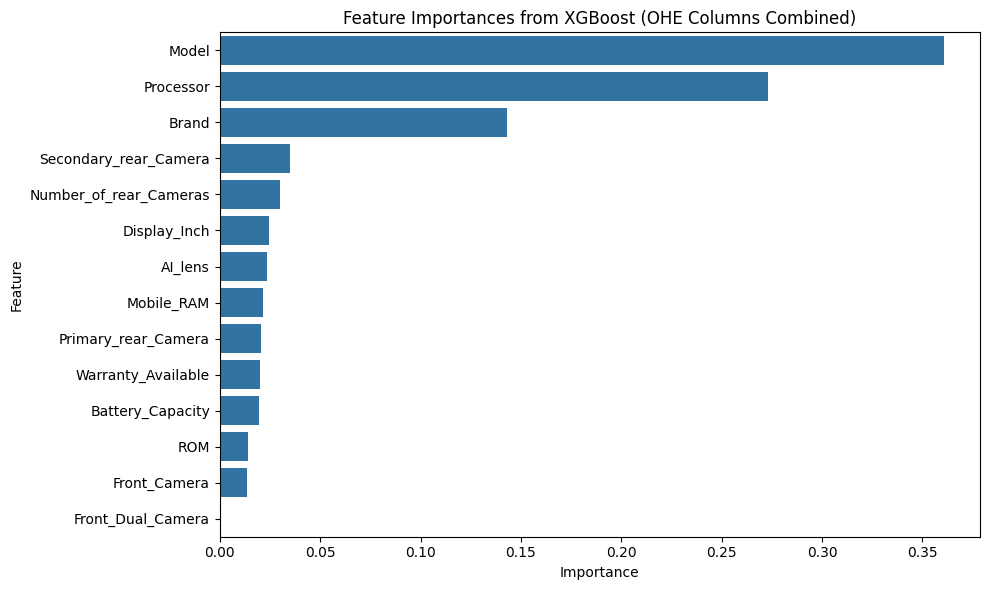

In [ ]:
# Step 8: Feature Importance with Individual and Combined OHE Columns
# Get the best model from GridSearchCV
best_model = step3.best_estimator_

# Extract the RandomForestRegressor from the pipeline
rf_model = best_model.named_steps['step2']

# Extract the ColumnTransformer
transformer = best_model.named_steps['step1']

# Get the feature importances from the RandomForestRegressor
feature_importances = rf_model.feature_importances_

# Get the transformed feature names
# 1. Target-encoded "Brand" column (index 2)
brand_feature_names = ['Brand']

# 2. One-hot encoded categorical columns (indices 1 and 3: Processor and Model)
cat_encoder = transformer.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(['Processor', 'Model'])

# 3. Numerical columns
num_feature_names = num_cols

# Combine all transformed feature names in the order they were transformed
all_transformed_feature_names = brand_feature_names + list(cat_feature_names) + num_feature_names

# Ensure the number of feature names matches the number of feature importances
assert len(all_transformed_feature_names) == len(feature_importances), "Mismatch between feature names and importances"

# Step 9: Compute Individual and Combined Feature Importances
# Create a mapping from transformed feature names to original column names for aggregation
feature_to_original = []

# Target-encoded "Brand" column (1 feature)
feature_to_original.extend([(name, 'Brand') for name in brand_feature_names])

# One-hot encoded categorical columns (Processor and Model)
for transformed_name in cat_feature_names:
    original_col = transformed_name.split('_', 1)[0]  # e.g., "Processor_Snapdragon" -> "Processor"
    feature_to_original.append((transformed_name, original_col))

# Numerical columns (unchanged)
feature_to_original.extend([(name, name) for name in num_feature_names])

# Create a DataFrame of transformed (individual) features and their importances
individual_importance_df = pd.DataFrame({
    'Transformed_Feature': all_transformed_feature_names,
    'Original_Feature': [pair[1] for pair in feature_to_original],
    'Importance': feature_importances
})

# Sort individual importances
individual_importance_df = individual_importance_df.sort_values(by='Importance', ascending=False)

# Aggregate importances by original feature (sum the importances for OHE columns)
combined_importance_df = individual_importance_df.groupby('Original_Feature')['Importance'].sum().reset_index()

# Sort combined importances
combined_importance_df = combined_importance_df.sort_values(by='Importance', ascending=False)

# Step 10: Display Results
print("\nIndividual Feature Importances (Including OHE Categories):")
print(individual_importance_df)

print("\nAggregated Feature Importances (OHE Columns Combined):")
print(combined_importance_df)

# Step 11: Plot Combined Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Original_Feature', data=combined_importance_df)
plt.title('Feature Importances from XGBoost (OHE Columns Combined)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_original = np.expm1(y_pred)  # If y_pred is in log scale
y_test_original = np.expm1(y_test)
mae_inr = mean_absolute_error(y_test_original, y_pred_original)
print('MAE on Test Data (INR):', mae_inr)

MAE on Test Data (INR): 6880.3351344752955


### LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 740, number of used features: 25
[LightGBM] [Info] Start training from score 9.593221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBM Best Params: {'step2__learning_rate': 0.01, 'step2__max_depth': 15, 'step2__n_estimators': 600, 'step2__reg_alpha': 0, 'step2__reg_lambda': 0, 'step2__subsample': 0.6}
Avg MAE over 5 folds: 0.44551264965619347
MAE on Test Data: 0.4203711687616182
R2 Score: 0.6044845270683216


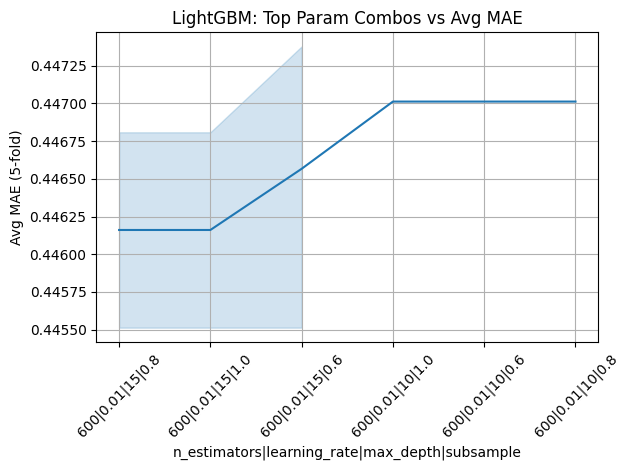

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Model
lgb_model = LGBMRegressor(random_state=42)

# Step 3: Pipeline
pipe_lgb = Pipeline([
    ('step1', step1),  # e.g., preprocessing step (scaler/encoder)
    ('step2', lgb_model)
])

# Step 4: Hyperparameter grid
param_grid_lgb = {
    'step2__n_estimators': [400, 600],
    'step2__learning_rate': [0.01, 0.1],
    'step2__max_depth': [5, 10, 15],
    'step2__subsample': [0.6, 0.8, 1.0],
    'step2__reg_alpha': [0, 0.1, 1],  # L1
    'step2__reg_lambda': [0, 1, 2]    # L2
}

# Step 5: Grid Search
grid_lgb = GridSearchCV(pipe_lgb, param_grid=param_grid_lgb, cv=5,
                        scoring='neg_mean_absolute_error', n_jobs=-1)
grid_lgb.fit(X_train, y_train)
y_pred_lgb = grid_lgb.predict(X_test)

# Step 6: Evaluation
print('LGBM Best Params:', grid_lgb.best_params_)
print('Avg MAE over 5 folds:', -grid_lgb.best_score_)
print('MAE on Test Data:', mean_absolute_error(y_test, y_pred_lgb))
print('R2 Score:', r2_score(y_test, y_pred_lgb))

# Step 7: Plot (Top 10)
results_lgb = grid_lgb.cv_results_
top_10_idx = results_lgb['rank_test_score'].argsort()[:10]
x_labels = [f"{results_lgb['param_step2__n_estimators'][i]}|{results_lgb['param_step2__learning_rate'][i]}|{results_lgb['param_step2__max_depth'][i]}|{results_lgb['param_step2__subsample'][i]}" for i in top_10_idx]
y_vals = [-results_lgb['mean_test_score'][i] for i in top_10_idx]

sns.lineplot(x=x_labels, y=y_vals)
plt.xticks(rotation=45)
plt.xlabel('n_estimators|learning_rate|max_depth|subsample')
plt.ylabel('Avg MAE (5-fold)')
plt.title('LightGBM: Top Param Combos vs Avg MAE')
plt.grid(True)
plt.tight_layout()
plt.show()



### ANN

In [ ]:
from sklearn.neural_network import MLPRegressor

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough' # Pass through any columns not specified
)

# Model - Multi-layer Perceptron Regressor (ANN)
# Initializing the ANN model. max_iter increased for better convergence during training.
mlp_model = MLPRegressor(random_state=42, max_iter=1000)


pipe_ann = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', mlp_model)
])

# This specifies the different hyperparameter combinations GridSearchCV will test.
param_grid_ann = {
    'regressor__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)], # Architectures
    'regressor__activation': ['relu', 'tanh'], # Activation functions
    'regressor__solver': ['adam'], # Optimizer
    'regressor__alpha': [0.0001, 0.001, 0.01], # L2 regularization
    'regressor__learning_rate_init': [0.001, 0.005], # Initial learning rate
    'regressor__max_iter': [1000] # Fixed max iterations for all grid search combinations
}

grid_search_ann = GridSearchCV(
    pipe_ann,
    param_grid_ann,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2 # Shows progress during fitting
)

print("\n--- Starting GridSearchCV for ANN model (this may take a while) ---")
grid_search_ann.fit(X_train, y_train)

y_pred_ann = grid_search_ann.predict(X_test)

print("\n--- ANN Model Evaluation Results ---")
print("Best parameters found by GridSearchCV:", grid_search_ann.best_params_)
print("Average MAE over 5 folds (best model):", -grid_search_ann.best_score_) # Convert from negative to positive

print("MAE on test data:", mean_absolute_error(y_test, y_pred_ann))
print("R2 Score on test data:", r2_score(y_test, y_pred_ann))



--- Starting GridSearchCV for ANN model (this may take a while) ---
Fitting 5 folds for each of 48 candidates, totalling 240 fits

--- ANN Model Evaluation Results ---
Best parameters found by GridSearchCV: {'regressor__activation': 'tanh', 'regressor__alpha': 0.01, 'regressor__hidden_layer_sizes': (50,), 'regressor__learning_rate_init': 0.001, 'regressor__max_iter': 1000, 'regressor__solver': 'adam'}
Average MAE over 5 folds (best model): 0.469336713502465
MAE on test data: 0.4067877093743798
R2 Score on test data: 0.6264325365125409


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


###9. Feature Importance Analysis

Show feature importance (especially from tree models like Random Forest or XGBoost)

Interpret which features most influence price


Individual Feature Importances (Including OHE Categories):
                      Transformed_Feature        Original_Feature  Importance
0                                   Brand                   Brand    0.143212
22                  Model_Premium_Classic                   Model    0.086422
4                 Processor_Google_Tensor               Processor    0.069279
16                     Model_Essential_4G                   Model    0.050452
24                    Model_Ultra_Premium                   Model    0.049024
21                     Model_Midrange_Pro                   Model    0.039284
6      Processor_MediaTek_Dimensity_Basic               Processor    0.035827
30                  Secondary_rear_Camera   Secondary_rear_Camera    0.034913
11             Processor_Snapdragon_Basic               Processor    0.034552
18                    Model_Feature_Phone                   Model    0.033994
31                 Number_of_rear_Cameras  Number_of_rear_Cameras    0.030018
8   

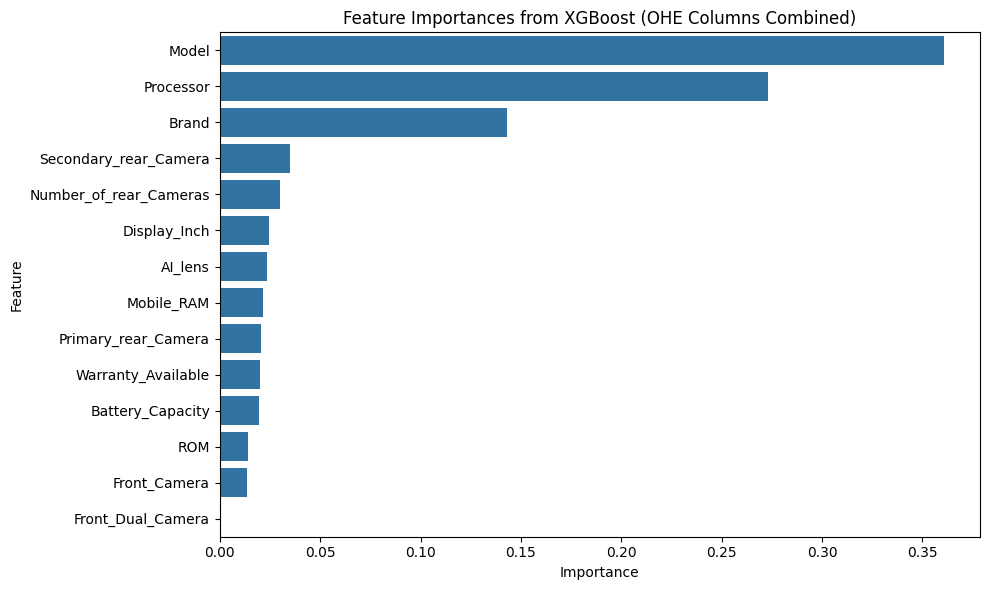

In [ ]:
# Step 8: Feature Importance with Individual and Combined OHE Columns
# Get the best model from GridSearchCV
best_model = step3.best_estimator_

# Extract the RandomForestRegressor from the pipeline
rf_model = best_model.named_steps['step2']

# Extract the ColumnTransformer
transformer = best_model.named_steps['step1']

# Get the feature importances from the RandomForestRegressor
feature_importances = rf_model.feature_importances_

# Get the transformed feature names
# 1. Target-encoded "Brand" column (index 2)
brand_feature_names = ['Brand']

# 2. One-hot encoded categorical columns (indices 1 and 3: Processor and Model)
cat_encoder = transformer.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(['Processor', 'Model'])

# 3. Numerical columns
num_feature_names = num_cols

# Combine all transformed feature names in the order they were transformed
all_transformed_feature_names = brand_feature_names + list(cat_feature_names) + num_feature_names

# Ensure the number of feature names matches the number of feature importances
assert len(all_transformed_feature_names) == len(feature_importances), "Mismatch between feature names and importances"

# Step 9: Compute Individual and Combined Feature Importances
# Create a mapping from transformed feature names to original column names for aggregation
feature_to_original = []

# Target-encoded "Brand" column (1 feature)
feature_to_original.extend([(name, 'Brand') for name in brand_feature_names])

# One-hot encoded categorical columns (Processor and Model)
for transformed_name in cat_feature_names:
    original_col = transformed_name.split('_', 1)[0]  # e.g., "Processor_Snapdragon" -> "Processor"
    feature_to_original.append((transformed_name, original_col))

# Numerical columns (unchanged)
feature_to_original.extend([(name, name) for name in num_feature_names])

# Create a DataFrame of transformed (individual) features and their importances
individual_importance_df = pd.DataFrame({
    'Transformed_Feature': all_transformed_feature_names,
    'Original_Feature': [pair[1] for pair in feature_to_original],
    'Importance': feature_importances
})

# Sort individual importances
individual_importance_df = individual_importance_df.sort_values(by='Importance', ascending=False)

# Aggregate importances by original feature (sum the importances for OHE columns)
combined_importance_df = individual_importance_df.groupby('Original_Feature')['Importance'].sum().reset_index()

# Sort combined importances
combined_importance_df = combined_importance_df.sort_values(by='Importance', ascending=False)

# Step 10: Display Results
print("\nIndividual Feature Importances (Including OHE Categories):")
print(individual_importance_df)

print("\nAggregated Feature Importances (OHE Columns Combined):")
print(combined_importance_df)

# Step 11: Plot Combined Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Original_Feature', data=combined_importance_df)
plt.title('Feature Importances from XGBoost (OHE Columns Combined)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

###10. Conclusion

###11. Deployment

In [ ]:
import joblib

# Save DataFrame
joblib.dump(df, 'df.joblib')

# Save features
joblib.dump(X, 'X.joblib')

# Save trained model (best estimator from GridSearchCV)
joblib.dump(step3.best_estimator_, 'pipe.joblib')

# Save feature importances
joblib.dump(combined_importance_df, 'combined_importance_df.joblib')

['combined_importance_df.joblib']